In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

In [18]:
test_dataset = pd.read_csv("C:/Users/ASU/Desktop/IITD/DATAScience/PythonProjectDataset/test___dataset.csv")
traindataset=pd.read_csv("C:/Users/ASU/Desktop/IITD/DATAScience/PythonProjectDataset/train__dataset.csv")


In [19]:
#here we will get 10 starting data set from taindataset 
traindataset.head(10)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  4   
1             2               1                     0                  2   
2             1               0                     1                  5   
3             1               0                     2                  4   
4             2               0                     0                  4   
5             2               0                     2                  3   
6             1               0                     0                  2   
7             2               0                     1                  3   
8             2               0                     2                  2   
9             2               0                     0                  2   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  0                           0                   0   
2                  0                           0                   0   
3                  0                           0                   0   
4                  1                           0                   0   
5                  0                           0                   1   
6                  0                           0                   4   
7                  2                           0                   0   
8                  0                           0                   1   
9                  2                           0                   0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0        118          2017             12            28                    1   
1         17          2018              4            14                    1   
2        349          2018             10             4                    0   
3         69          2018              6            12                    0   
4         11          2018              1            20                    1   
5         51          2018              9            18                    1   
6          7          2018              2             5                    2   
7         61          2018             11            21                    1   
8         32          2018              9            25                    1   
9         39          2017              8            14                    0   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   
5               0                             0   
6               0                             0   
7               0                             0   
8               0                             0   
9               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0              110.80   
1                                     0              145.00   
2                                     0               96.67   
3                                     0              120.00   
4                                     0               69.50   
5                                     0              149.40   
6                                     0               86.00   
7                                     0              120.70   
8                                     0              134.78   
9                                     0              109.00   

   no_of_special_requests  booking_status  
0                       2               0  
1                       0               1  
2                       0               1  
3                       0               1  
4               

In [20]:
#we dont want null value in dataset 
traindataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

In [21]:
test_dataset

ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       9740.0             2               0                     1   
1       7913.0             2               0                     0   
2       9379.0             1               0                     2   
3       3238.0             2               0                     2   
4      15675.0             2               0                     1   
...        ...           ...             ...                   ...   
18133   6889.0             2               0                     1   
18134  15052.0             1               0                     1   
18135  14441.0             2               0                     2   
18136  13866.0             2               0                     0   
18137      NaN             2               0                     0   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
0                      2                  0                           1   
1                      2                  0                           0   
2                      3                  0                           0   
3                      0                  2                           0   
4                      4                  0                           0   
...                  ...                ...                         ...   
18133                  3                  0                           0   
18134                  2                  0                           0   
18135                  2                  0                           0   
18136                  2                  0                           0   
18137                  2                  0                           0   

       room_type_reserved  lead_time  arrival_year  arrival_month  \
0                       0         65          2018              3   
1                       0        322          2018             12   
2                       0        115          2018              2   
3                       0        386          2018             10   
4                       1         51          2018              8   
...                   ...        ...           ...            ...   
18133                   1         37          2018              3   
18134                   0         40          2018             11   
18135                   0        144          2018              7   
18136                   1         30          2018              3   
18137                   0        211          2018              5   

       arrival_date  market_segment_type  repeated_guest  \
0                28                    1               0   
1                 9                    0               0   
2                27                    0               0   
3                23                    1               0   
4                31                    1               0   
...             ...                  ...             ...   
18133            14                    1               0   
18134             7                    1               0   
18135             3                    0               0   
18136             4                    1               0   
18137            20                    0               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
18133                             0                                     0   
18134                             0                                     0   
18135                      

In [22]:
#So very thing is not null
traindataset.nunique().count()

18

In [23]:
print("Test DATA",test_dataset.shape)
print("TAIN DATA",traindataset.shape)

Test DATA (18138, 18)
TAIN DATA (18137, 18)


In [42]:
#hat we have to predict
l=traindataset.columns.values
k=test_dataset.columns.values
for i in l:
    if i not in k:
        print("Target Variable is ",i.upper())

Target Variable is  BOOKING_STATUS


In [25]:
#What we have to predict from test is booking_status
traindataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

In [26]:
#Data Types
traindataset.dtypes
traindataset.count()

no_of_adults                            18137
no_of_children                          18137
no_of_weekend_nights                    18137
no_of_week_nights                       18137
type_of_meal_plan                       18137
required_car_parking_space              18137
room_type_reserved                      18137
lead_time                               18137
arrival_year                            18137
arrival_month                           18137
arrival_date                            18137
market_segment_type                     18137
repeated_guest                          18137
no_of_previous_cancellations            18137
no_of_previous_bookings_not_canceled    18137
avg_price_per_room                      18137
no_of_special_requests                  18137
booking_status                          18137
dtype: int64

In [27]:
#Investigate all the elements with each data feature
#unique vqlues can be string numeric or so on

for coloums in traindataset:
    try:
        unique_values=np.unique(traindataset[coloums])
    except:
        unique_values=traindataset[coloums].unique()
    nr_values=len(unique_values)
    if nr_values<10:
        print('The number of values for features  {}  : {} ----  {}'.format(coloums.upper(),nr_values,unique_values))
    else:
        print('The number of values for features {}  : {} '.format(coloums.upper(),nr_values))

The number of values for features  NO_OF_ADULTS  : 5 ----  [0 1 2 3 4]
The number of values for features  NO_OF_CHILDREN  : 5 ----  [0 1 2 3 9]
The number of values for features  NO_OF_WEEKEND_NIGHTS  : 8 ----  [0 1 2 3 4 5 6 7]
The number of values for features NO_OF_WEEK_NIGHTS  : 18 
The number of values for features  TYPE_OF_MEAL_PLAN  : 4 ----  [0 1 2 3]
The number of values for features  REQUIRED_CAR_PARKING_SPACE  : 2 ----  [0 1]
The number of values for features  ROOM_TYPE_RESERVED  : 7 ----  [0 1 2 3 4 5 6]
The number of values for features LEAD_TIME  : 341 
The number of values for features  ARRIVAL_YEAR  : 2 ----  [2017 2018]
The number of values for features ARRIVAL_MONTH  : 12 
The number of values for features ARRIVAL_DATE  : 31 
The number of values for features  MARKET_SEGMENT_TYPE  : 5 ----  [0 1 2 3 4]
The number of values for features  REPEATED_GUEST  : 2 ----  [0 1]
The number of values for features  NO_OF_PREVIOUS_CANCELLATIONS  : 9 ----  [ 0  1  2  3  4  5  6 11 1

'''Missing Data
As models cannot take in null values, it is important to check for and handle missing data before modeling.
'''

In [28]:

# Checking for missing data
traindataset.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#Market segment designation. In categories, the term 0 means “Travel Agents” and 2  means “Tour Operators” and so on .
#Cleaning DATA
""" WE have already clean data 
 so we will visualised the data 
 
 
 
Duplicate values

"" we do not expect any duplicates. However, it is good practice to ensure our dataset does not contain duplicates."""

In [44]:


traindataset.duplicated().value_counts()

False    14026
True      4111
dtype: int64

In [45]:
traindataset[traindataset.duplicated(keep='first')]

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
182               1               0                     0                  3   
256               2               0                     0                  2   
325               2               0                     0                  2   
368               1               0                     1                  2   
431               1               0                     2                  1   
...             ...             ...                   ...                ...   
18113             2               0                     0                  3   
18116             1               0                     1                  1   
18120             2               0                     0                  2   
18129             2               0                     1                  2   
18132             1               0                     0                  2   

       type_of_meal_plan  required_car_parking_space  room_type_reserved  \
182                    0                           0                   0   
256                    0                           0                   0   
325                    0                           0                   0   
368                    0                           0                   0   
431                    0                           0                   0   
...                  ...                         ...                 ...   
18113                  0                           0                   0   
18116                  0                           0                   0   
18120                  0                           0                   0   
18129                  0                           0                   0   
18132                  0                           0                   0   

       lead_time  arrival_year  arrival_month  arrival_date  \
182          113          2018              5            31   
256           70          2018              6             3   
325           68          2017              9            29   
368          219          2017              9             4   
431            1          2018              2            28   
...          ...           ...            ...           ...   
18113        105          2018             10            12   
18116        118          2018              6             6   
18120         15          2017             12             1   
18129        338          2018             10             7   
18132        103          2018              4            19   

       market_segment_type  repeated_guest  no_of_previous_cancellations  \
182                      2               0                             0   
256                      0               0                             0   
325                      0               0                             0   
368                      0               0                             0   
431                      0               0                             0   
...                    ...             ...                           ...   
18113                    1               0                             0   
18116                    0               0                             0   
18120                    1               1                             1   
18129                    0               0                             0   
18132                    0               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
182                                       0              100.00   
256                                       0              100.00   
325                                       0               65.00   
368                                       0               76.67   
431                                       0               60.00   
...                                     ...                 .

Our dataset contains duplicates. However, it is possible that multiple bookings with the same features were made on the same 
    say. Since we do not have a feature such as booking ID, we cannot say for sure that those are true duplicates which makes 
    deleting those duplicates questionable.
    

In [30]:
#g = sns.pairplot(traindataset[[ 'no_of_adults' , 'no_of_children' , 'no_of_weekend_nights' ,'no_of_week_nights' , 'type_of_meal_plan' ,'required_car_parking_space' ,'room_type_reserved']],hue='booking_status')#, height = 5, kin
#Data Visualization


# Correlation using pearson method'

The Pearson correlation coefficient is a measure of the linear relationship between two variables. 
It ranges from -1 to 1, where -1 indicates a perfectly negative linear relationship, 0 indicates no linear relationship,
and 1 indicates a perfectly positive linear relationship


In [31]:
# correlation using pearson method
traindataset.corr(method='pearson')['booking_status'].sort_values(ascending=False)

booking_status                          1.000000
lead_time                               0.434314
arrival_year                            0.183256
avg_price_per_room                      0.145245
no_of_week_nights                       0.096472
no_of_adults                            0.094354
type_of_meal_plan                       0.076685
no_of_weekend_nights                    0.061117
no_of_children                          0.035093
room_type_reserved                      0.021723
arrival_date                            0.011389
arrival_month                          -0.011472
no_of_previous_cancellations           -0.031852
market_segment_type                    -0.045906
no_of_previous_bookings_not_canceled   -0.060697
required_car_parking_space             -0.092640
repeated_guest                         -0.106715
no_of_special_requests                 -0.248289
Name: booking_status, dtype: float64

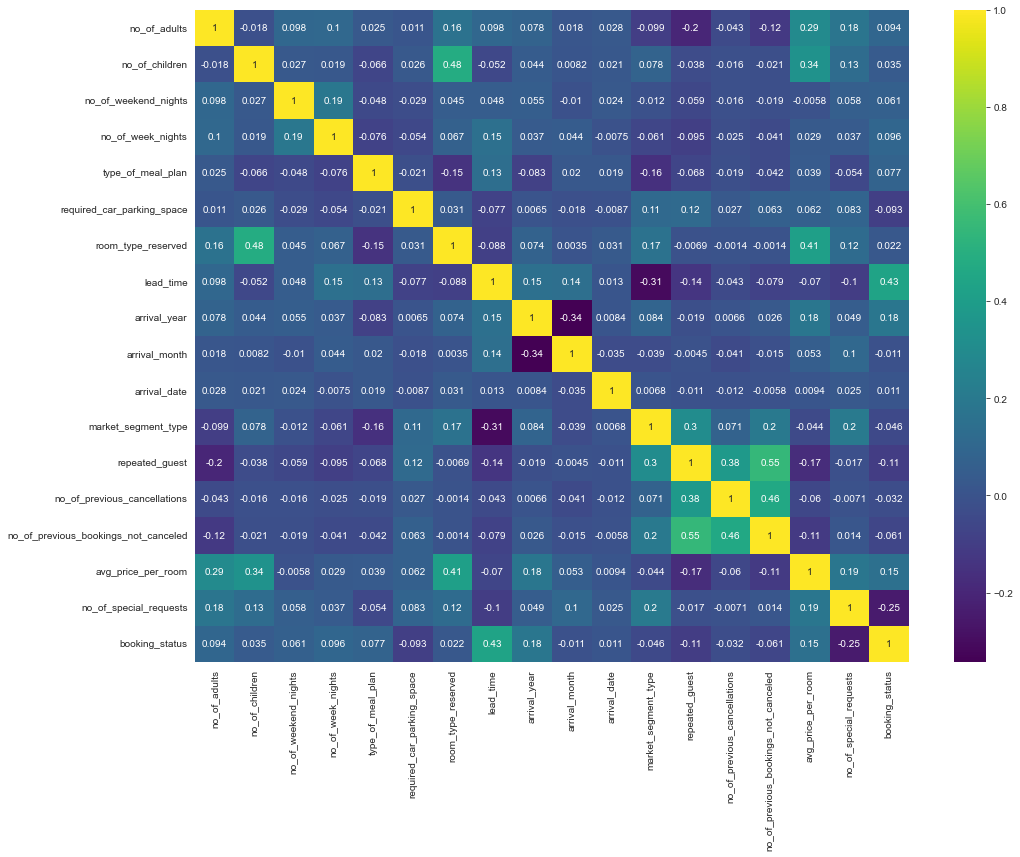

In [43]:
#Corelation of variables
plt.figure(figsize=(16,12))
sns.heatmap(traindataset.corr(method='pearson'), annot=True, cmap='viridis')
plt.show()

Data Visualization

For supervised learning tasks, identify & visualize the target attribute(s)

In [32]:
#getting the categorical variables

categoricalV = traindataset.columns.drop(['booking_status','avg_price_per_room','no_of_previous_bookings_not_canceled',
                                            'no_of_previous_cancellations',
                                            'lead_time',
                                            'arrival_date'])
print(len(traindataset))

18137


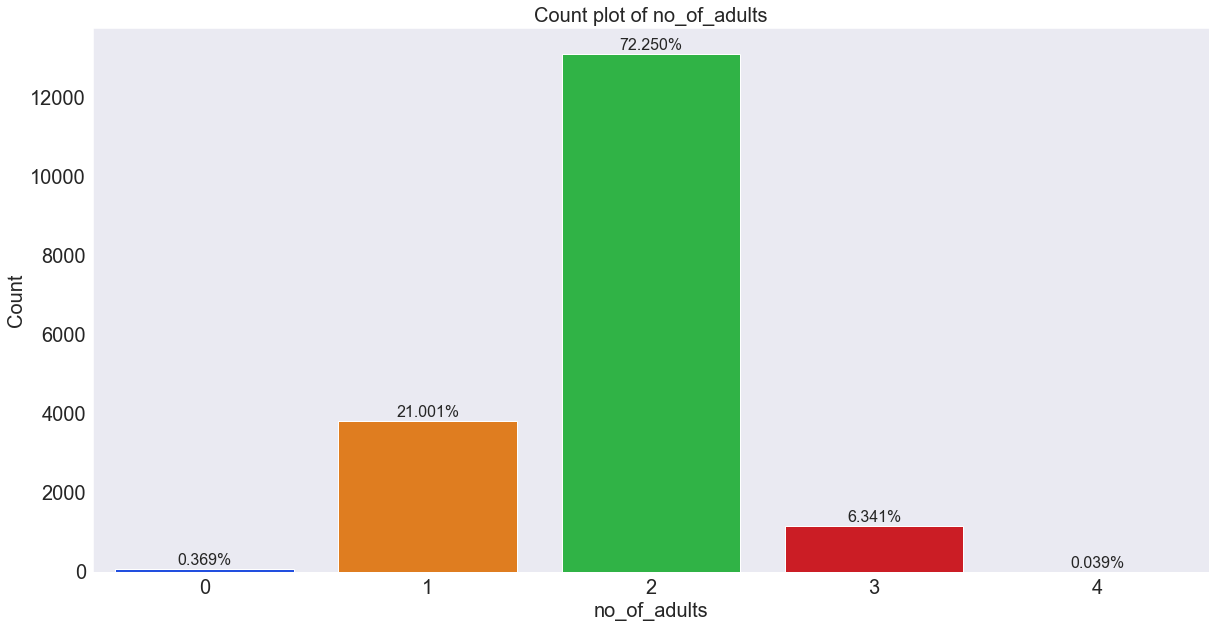

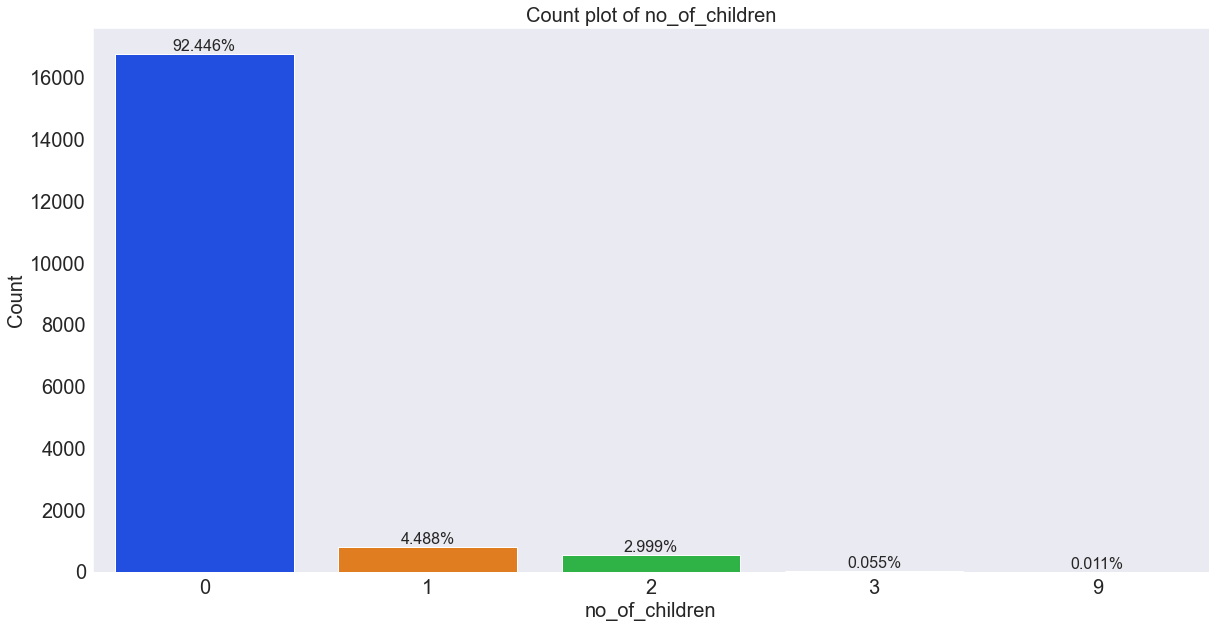

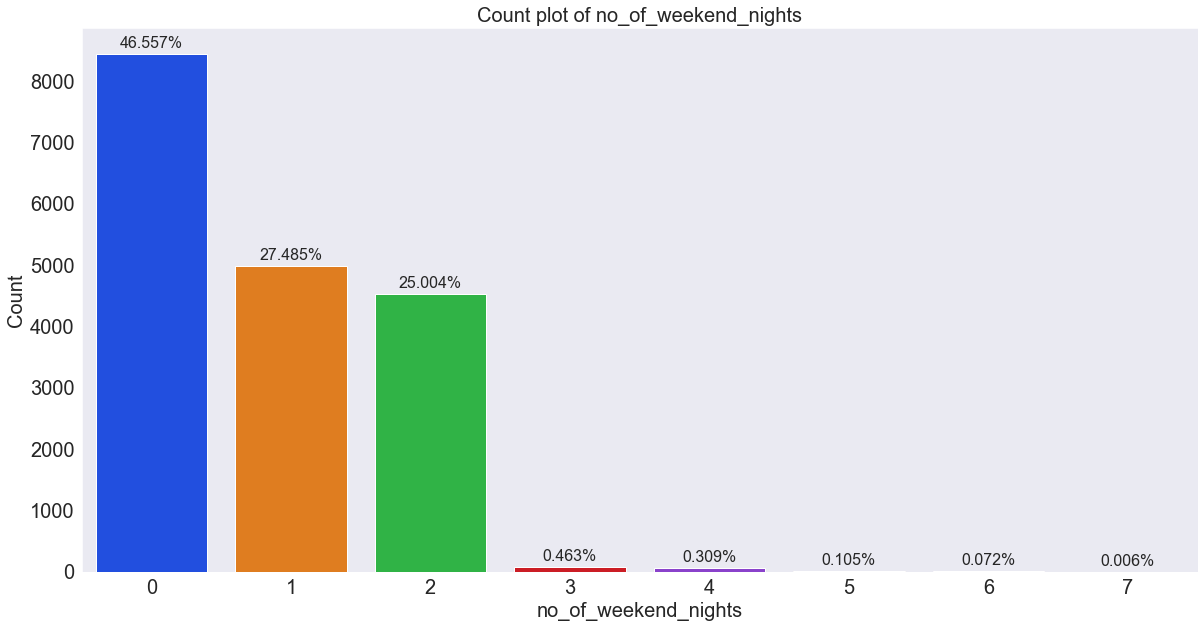

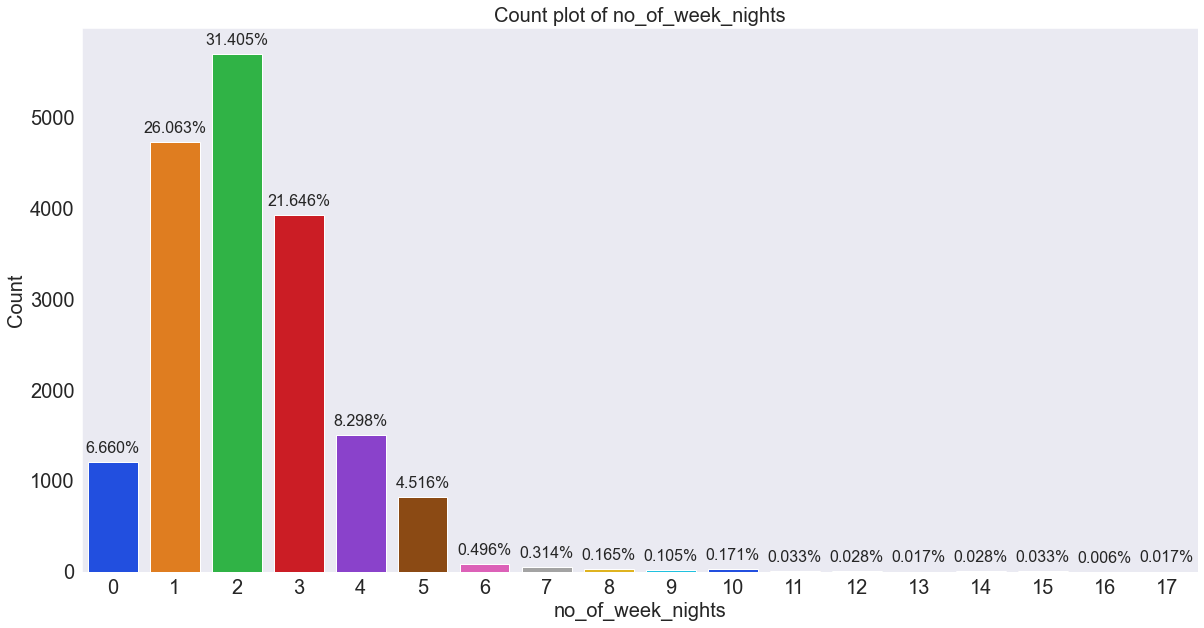

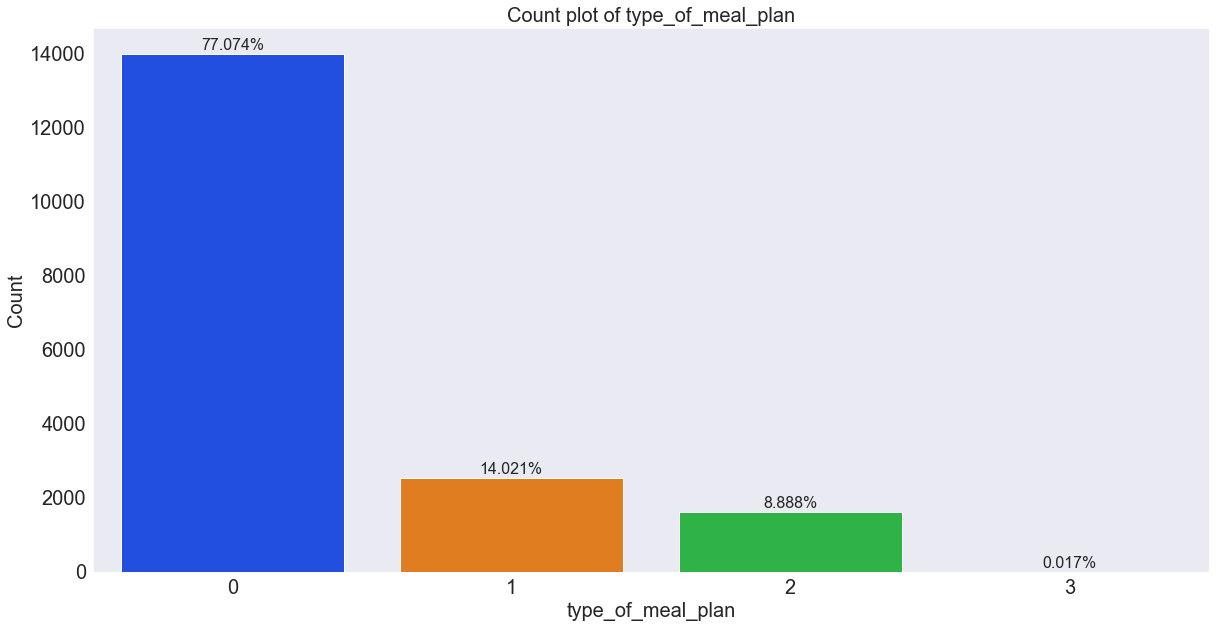

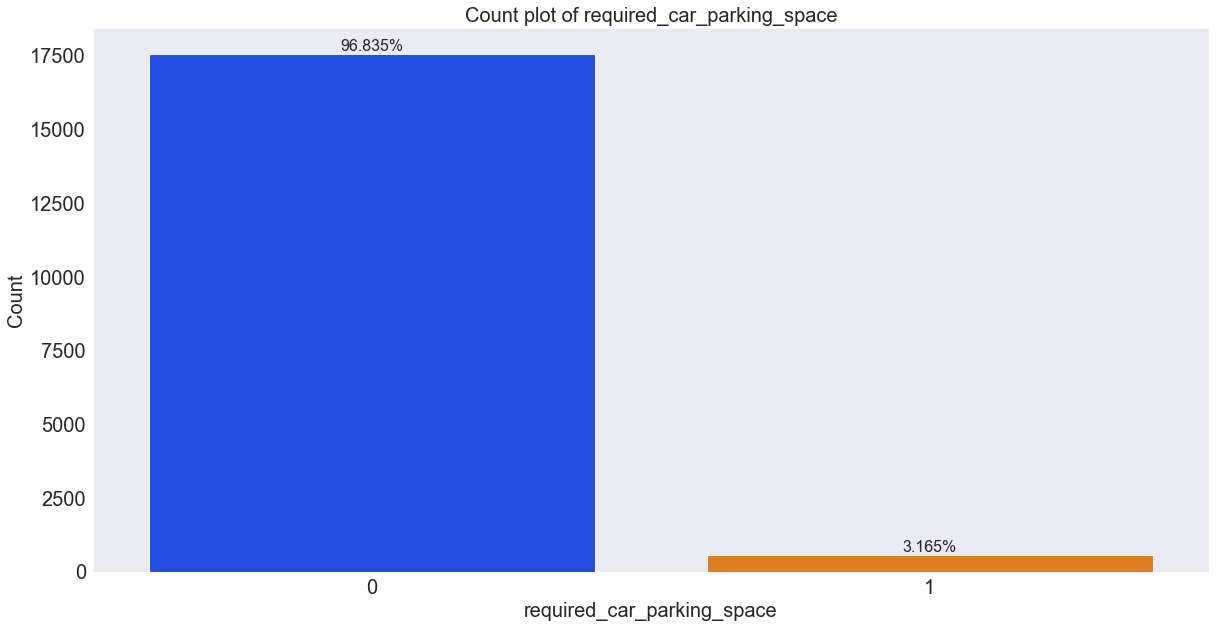

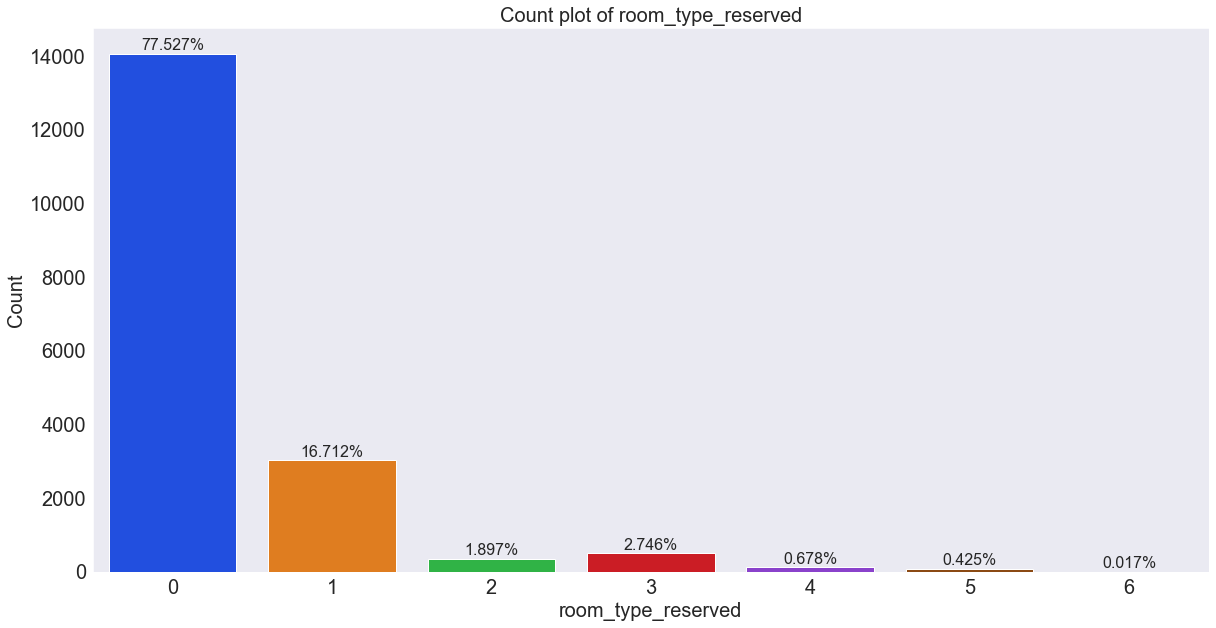

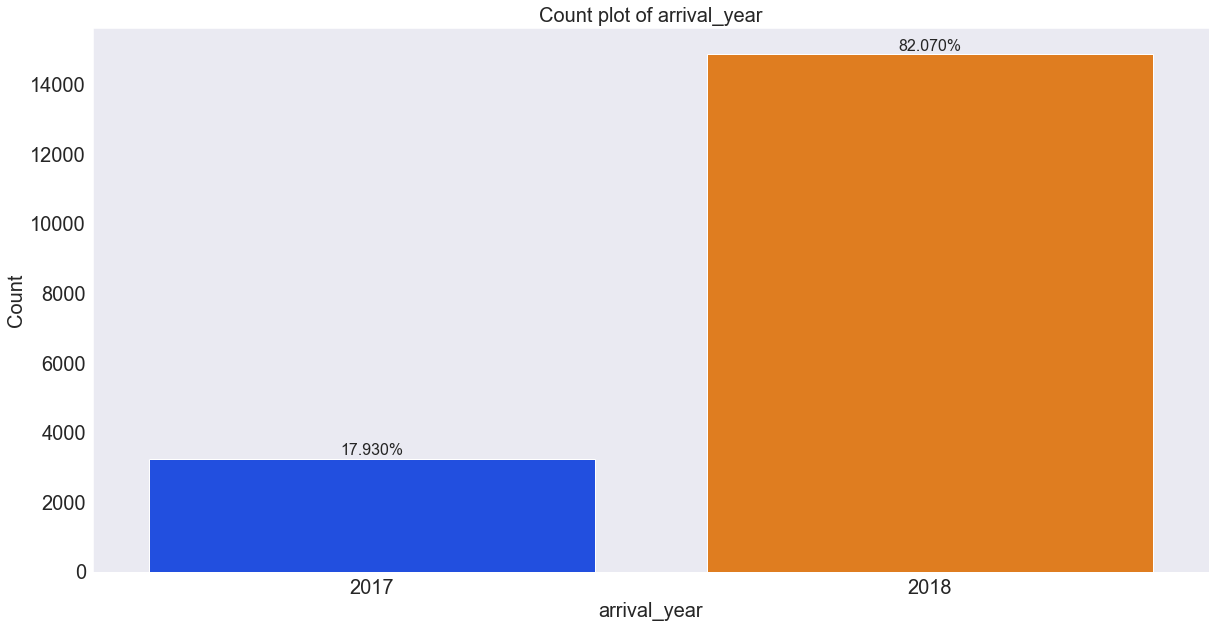

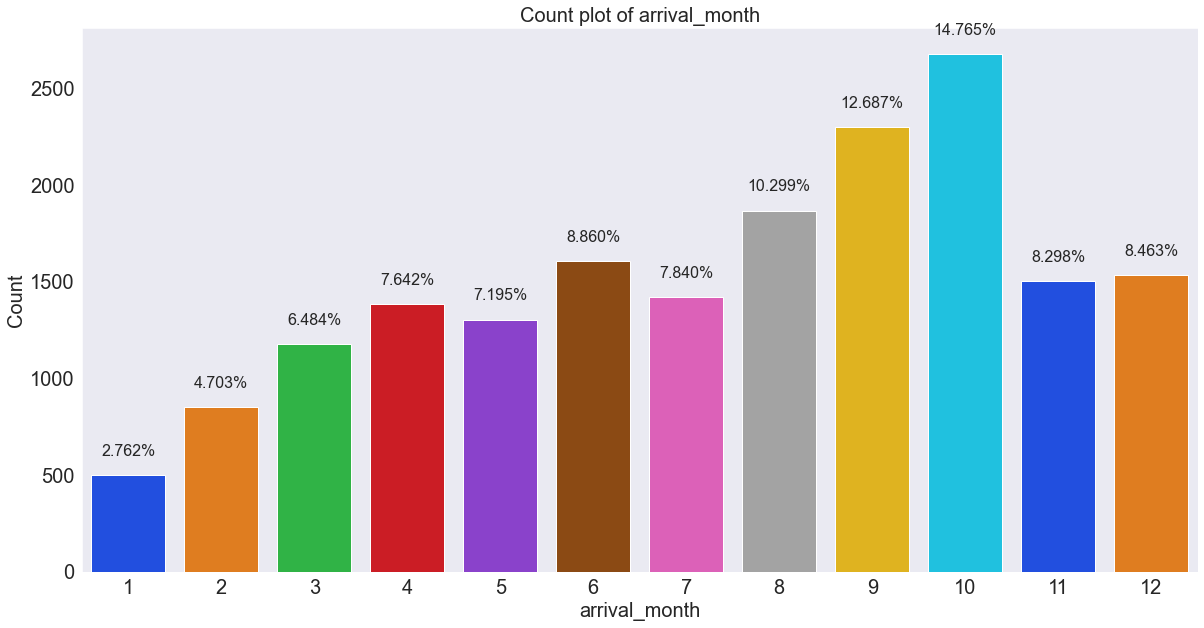

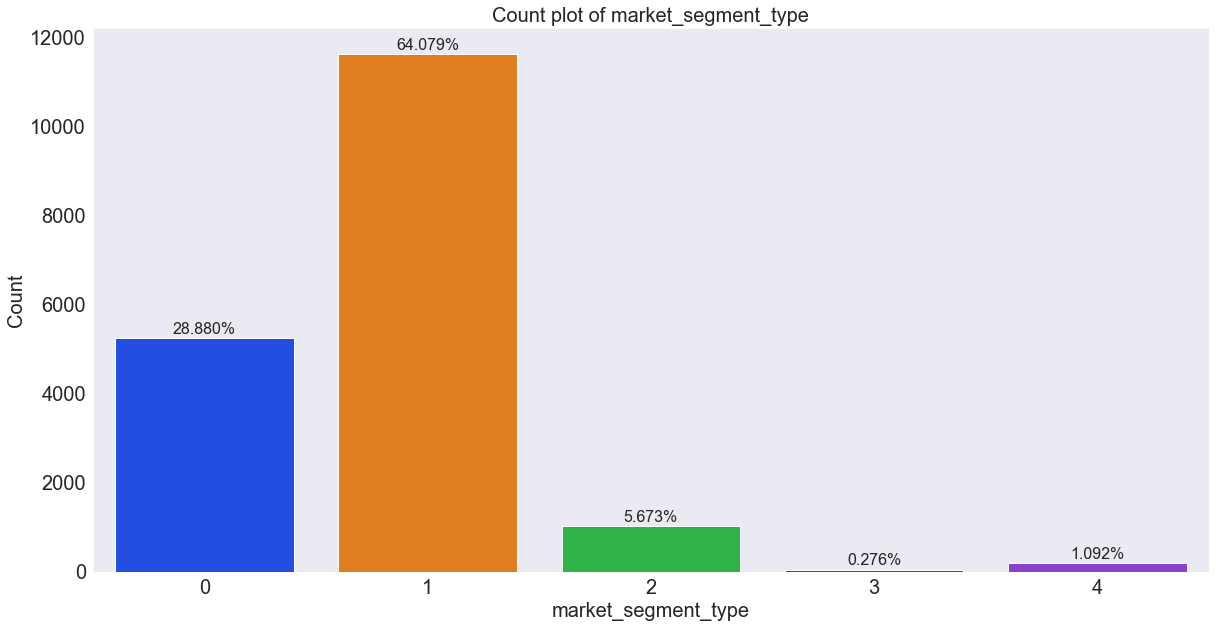

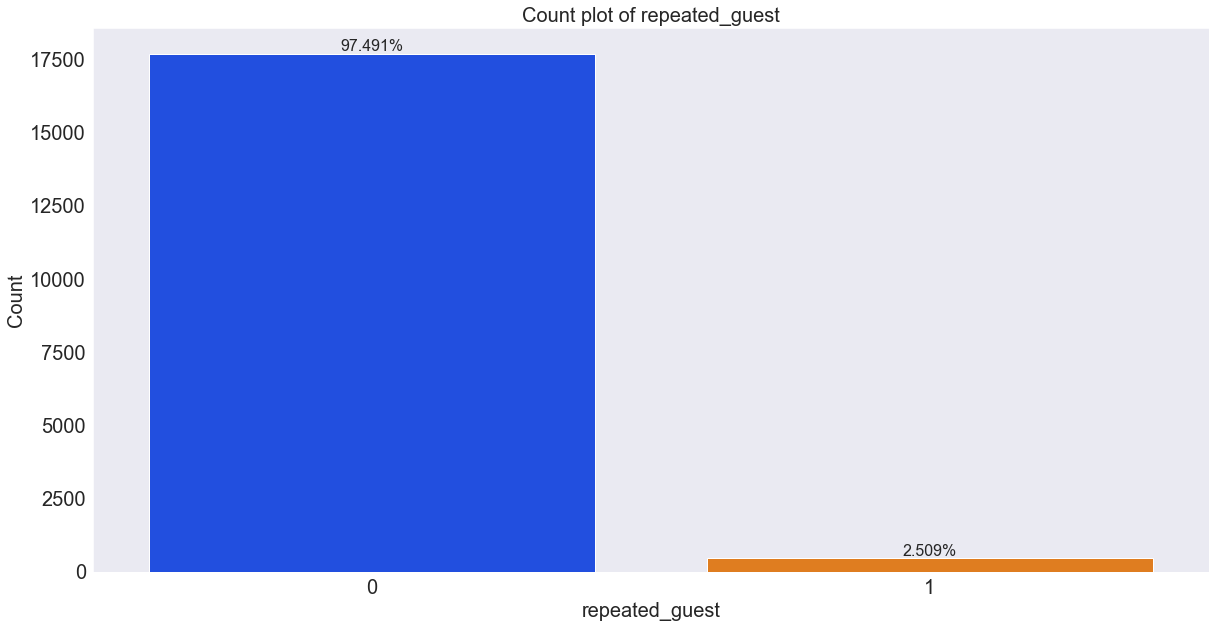

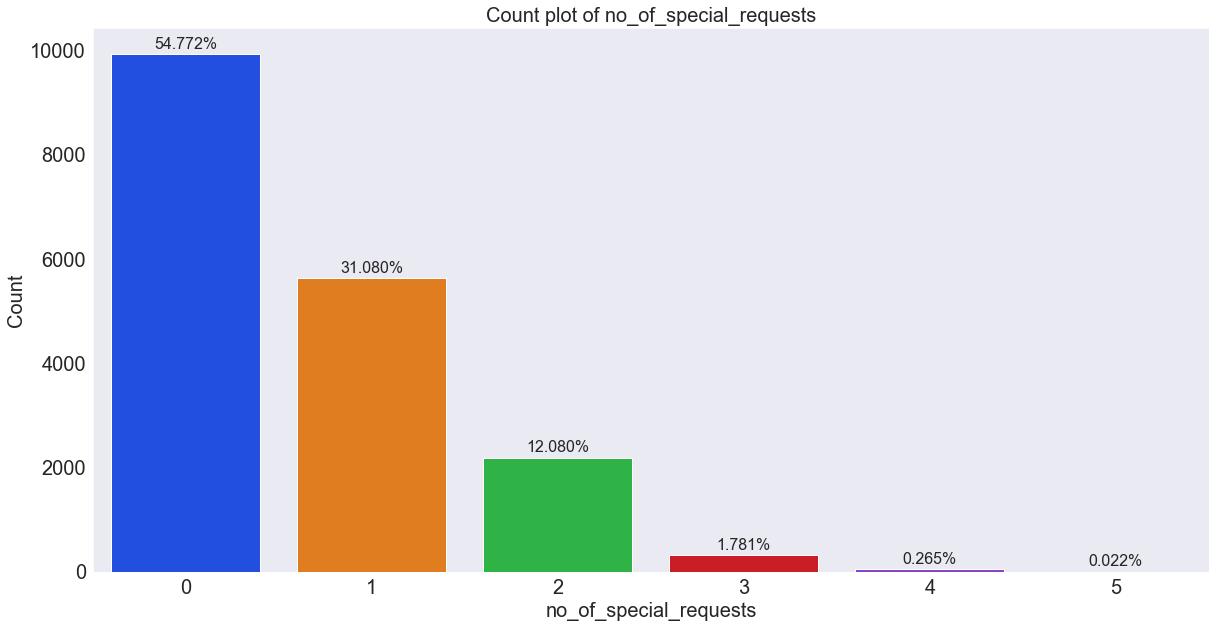

In [33]:

#plotting count plot for the categorical variables to show thier variation
for i in categoricalV:
    
    plt.figure(figsize=(20,10))
    sns.set_style("dark")
    plot = sns.countplot(data =traindataset, x=i,palette='bright')
    
    #adding the percentage of each bar above it 18137
    for bar in plot.patches:
      
        percentage = '{:.3f}%'.format(100 * bar.get_height()/len(traindataset))
        x = bar.get_x() + bar.get_width()/2
        y = bar.get_height()+100
        plot.annotate(percentage, (x, y),ha='center',size=16)
    
    plt.xticks(size=20)
    plt.xlabel(i,size=20)
    plt.yticks(size=20)
    plt.ylabel('Count',size=20)
    plt.title('Count plot of ' + i,size=20)
    plt.show()

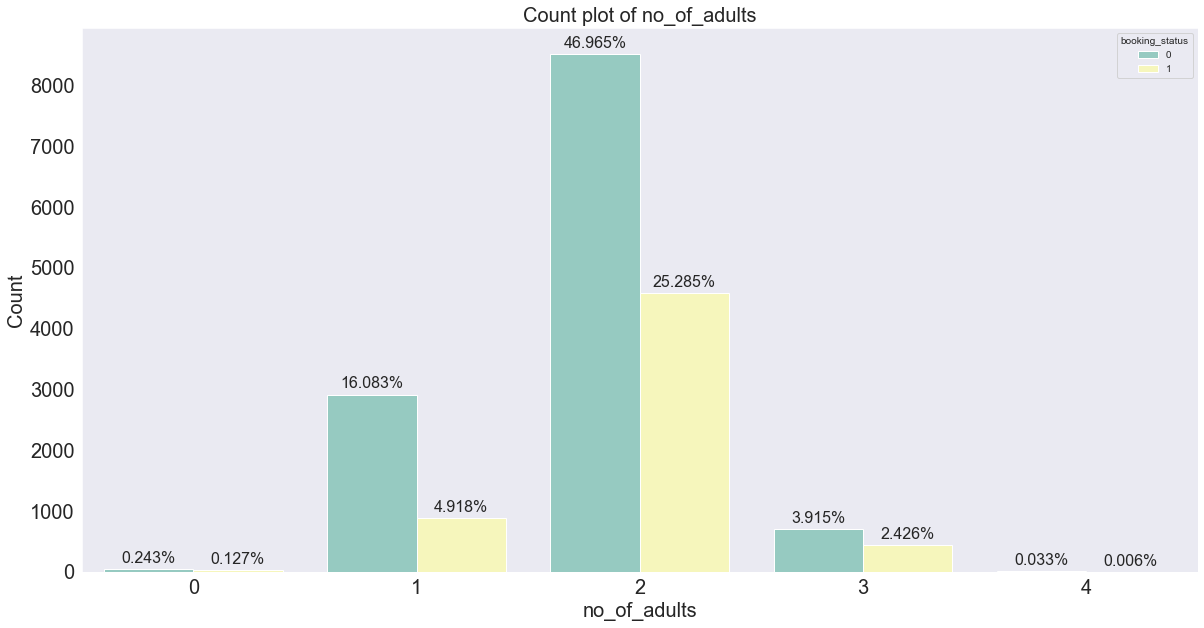

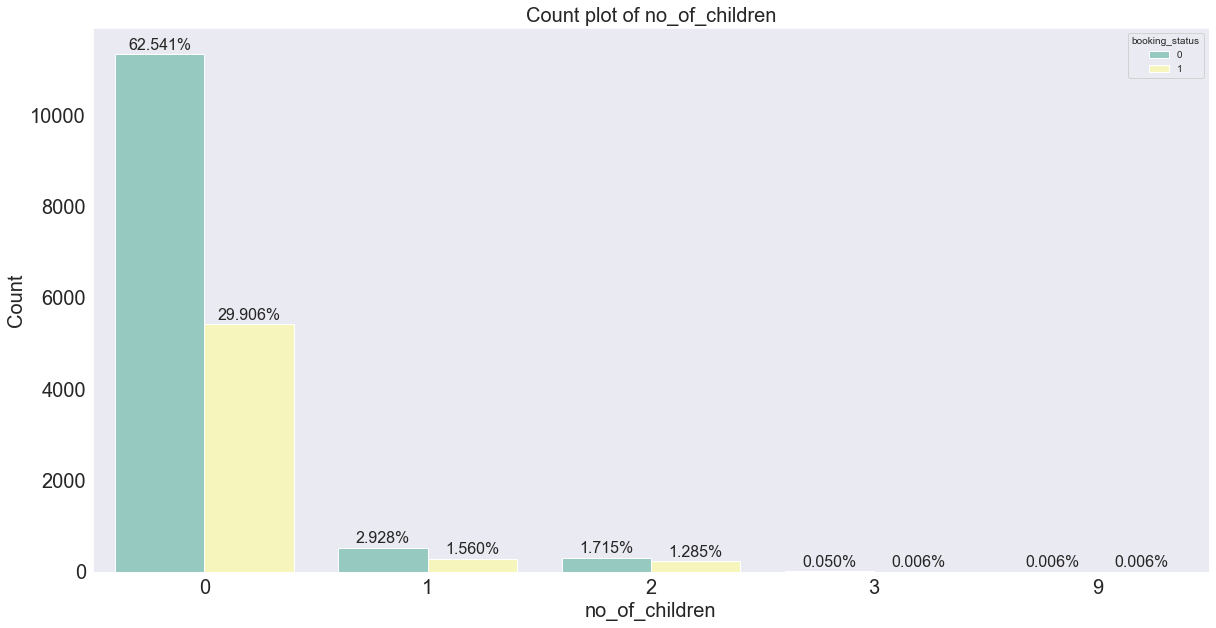

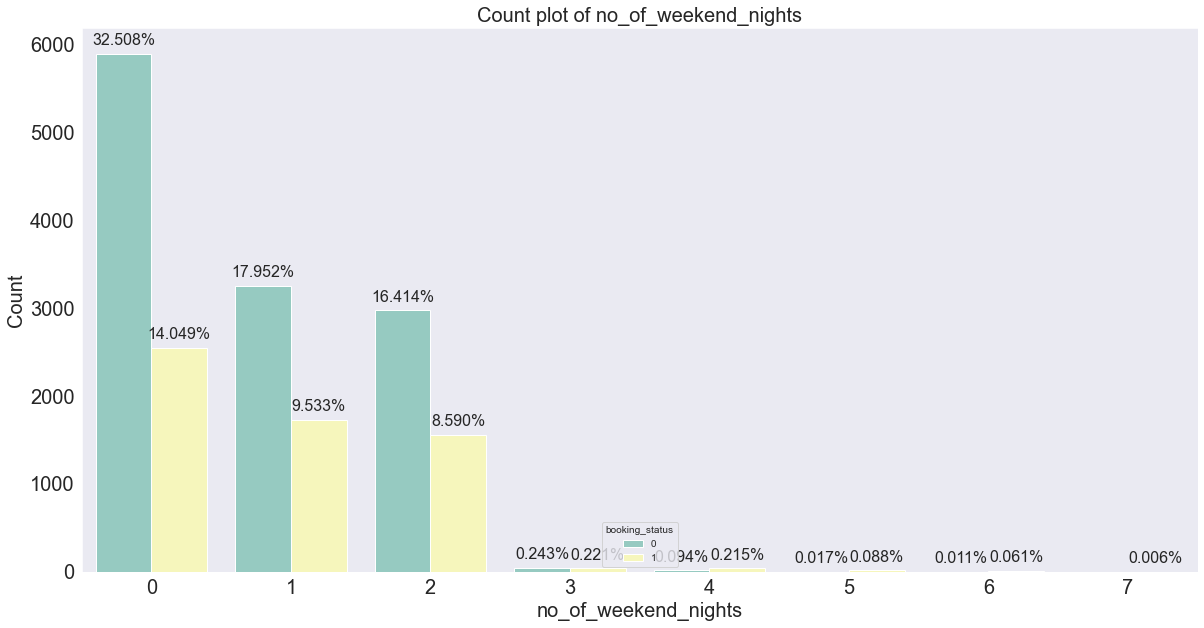

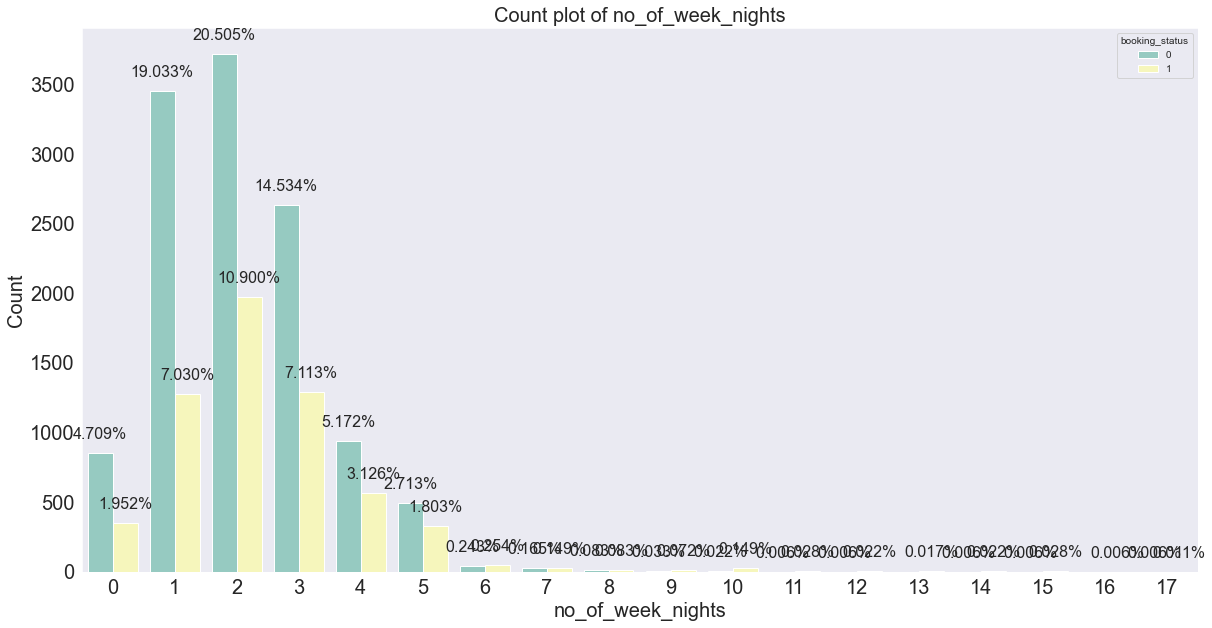

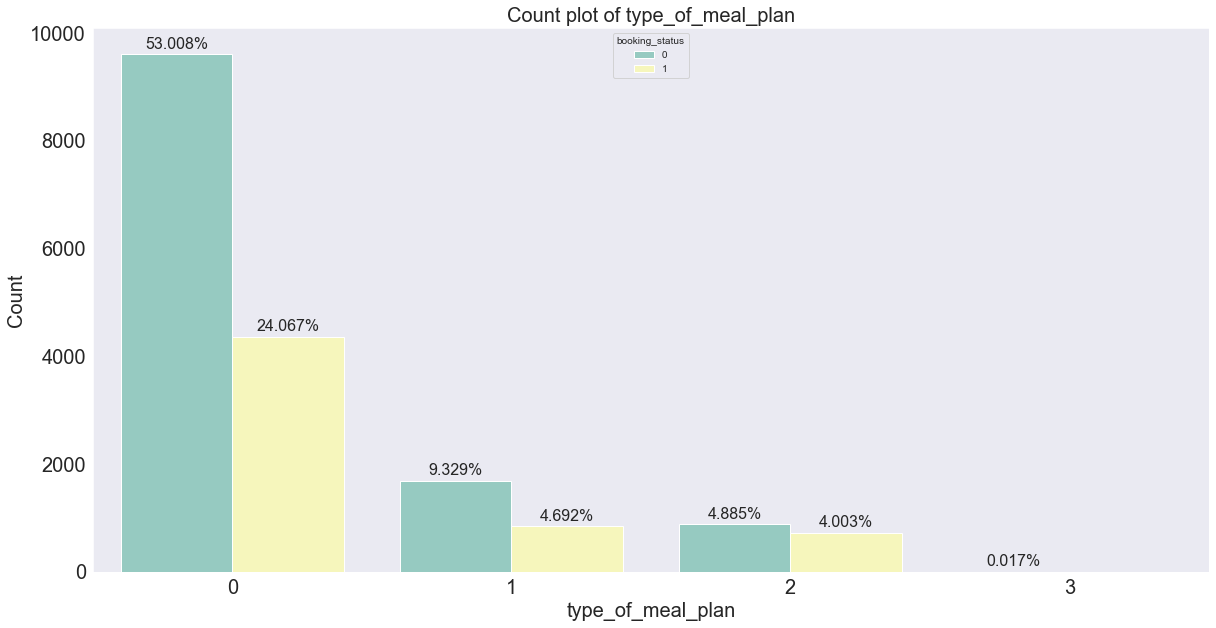

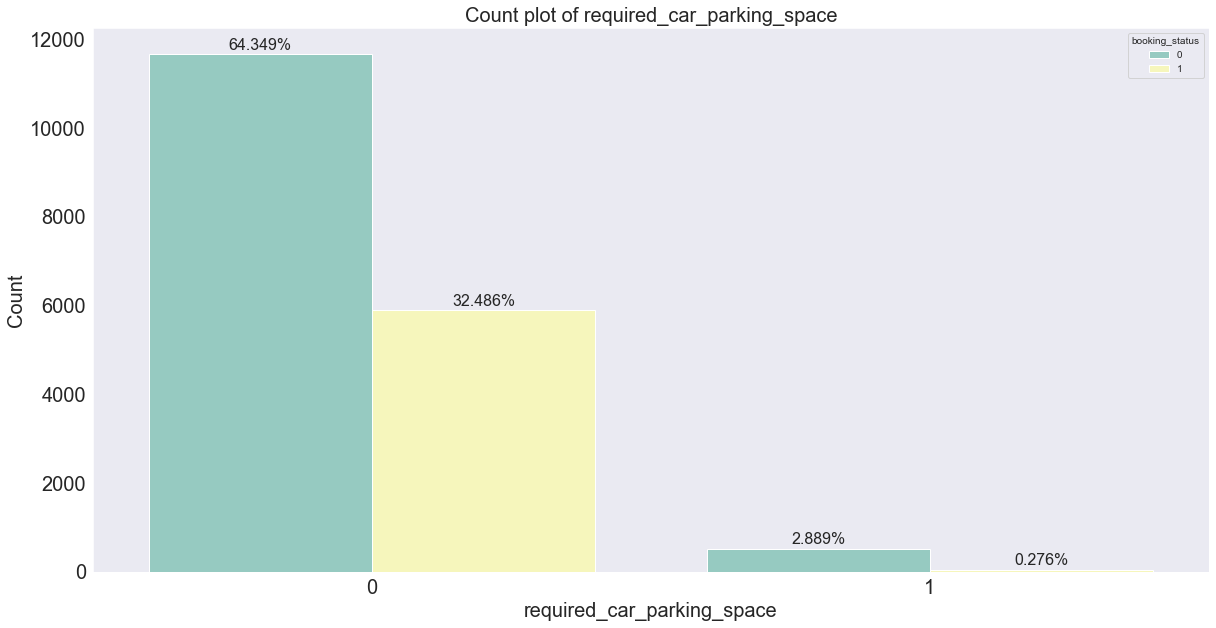

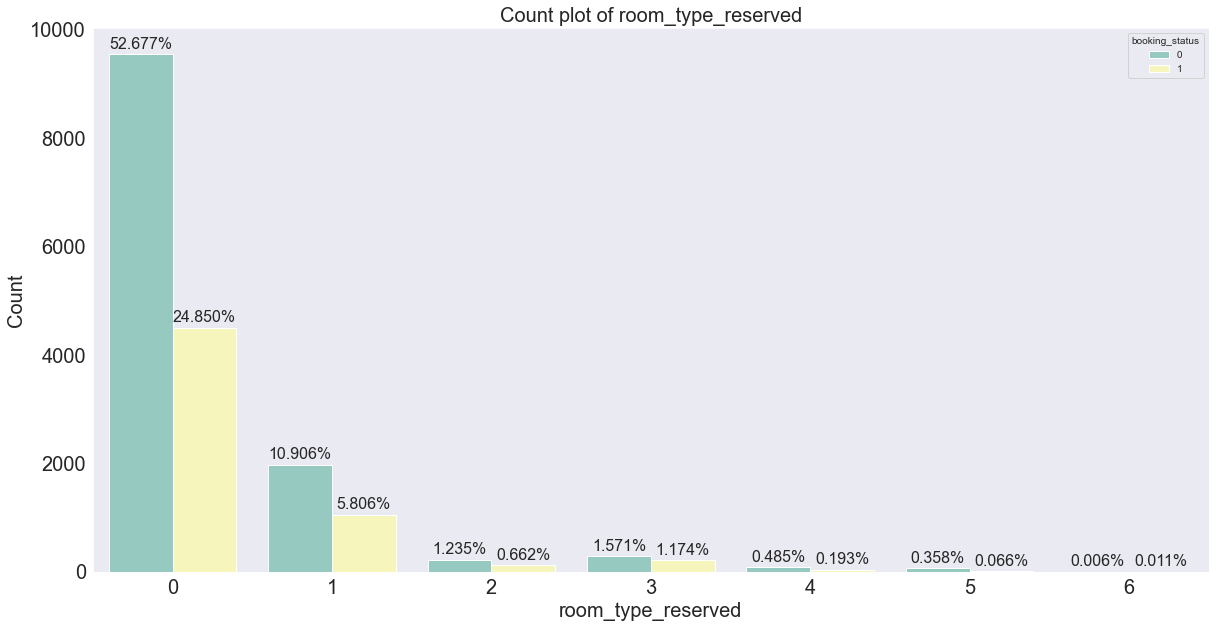

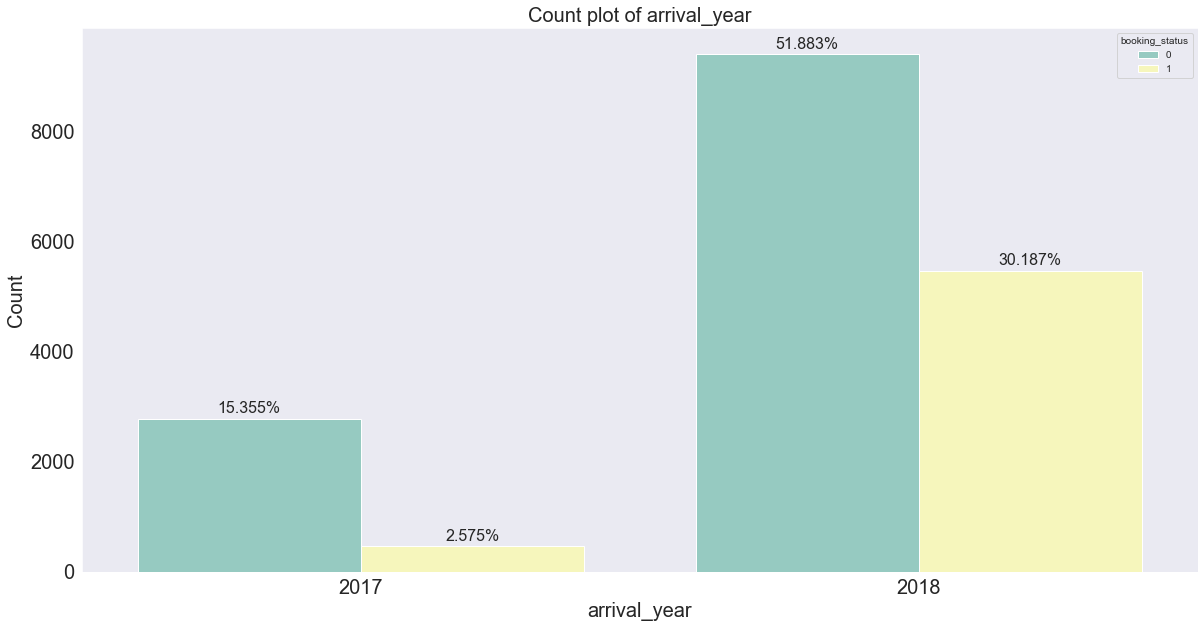

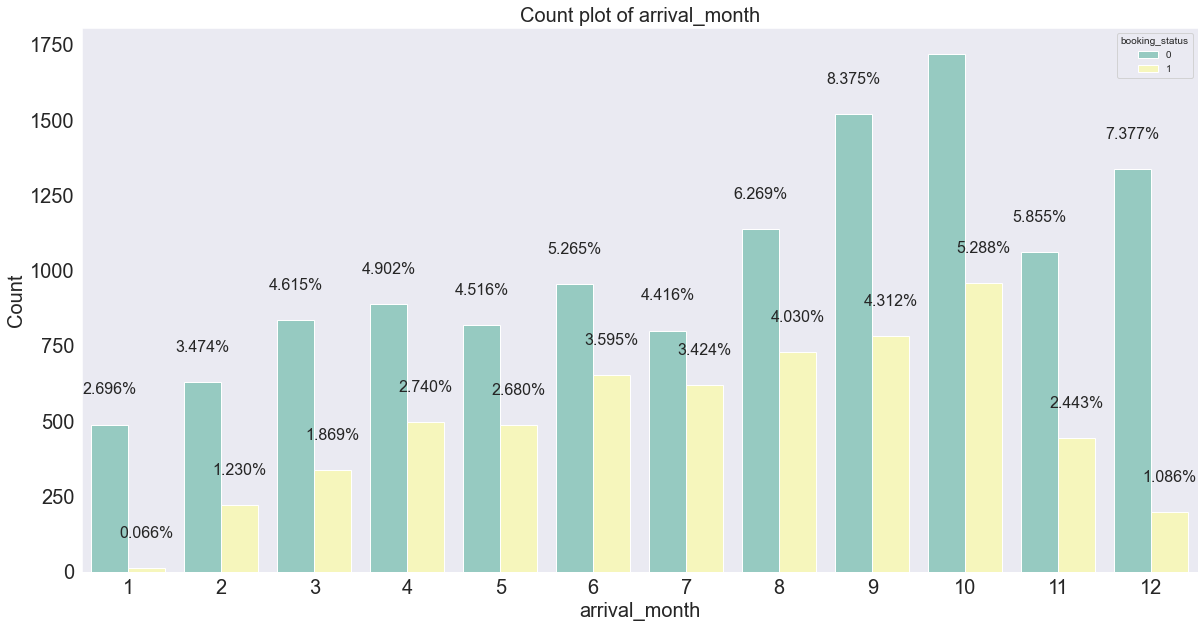

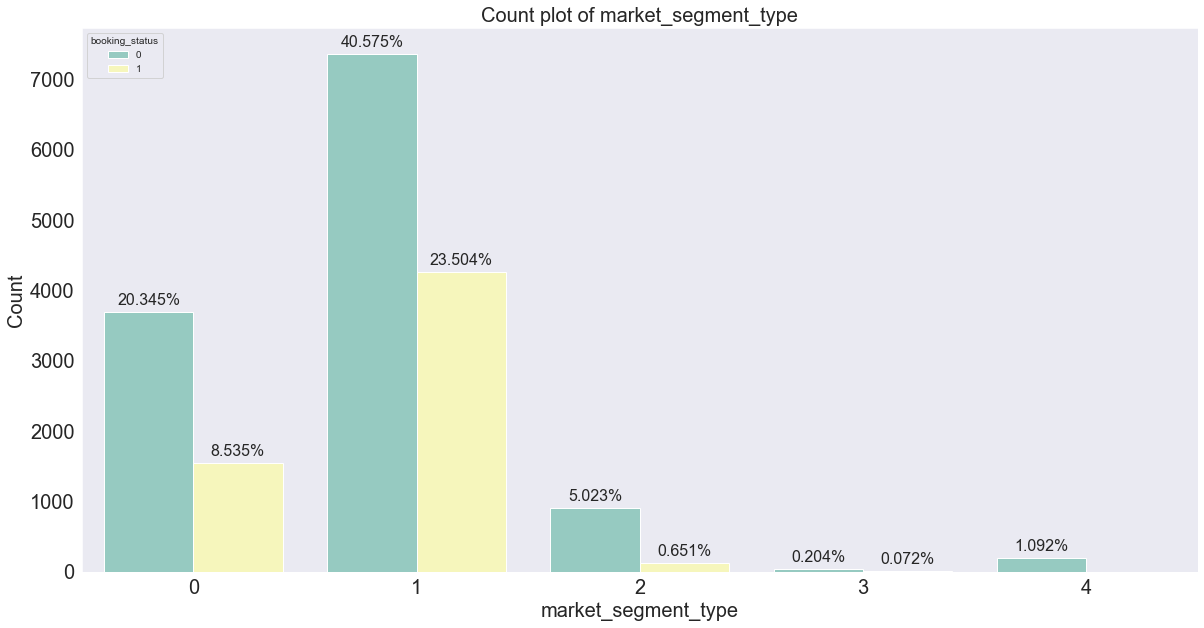

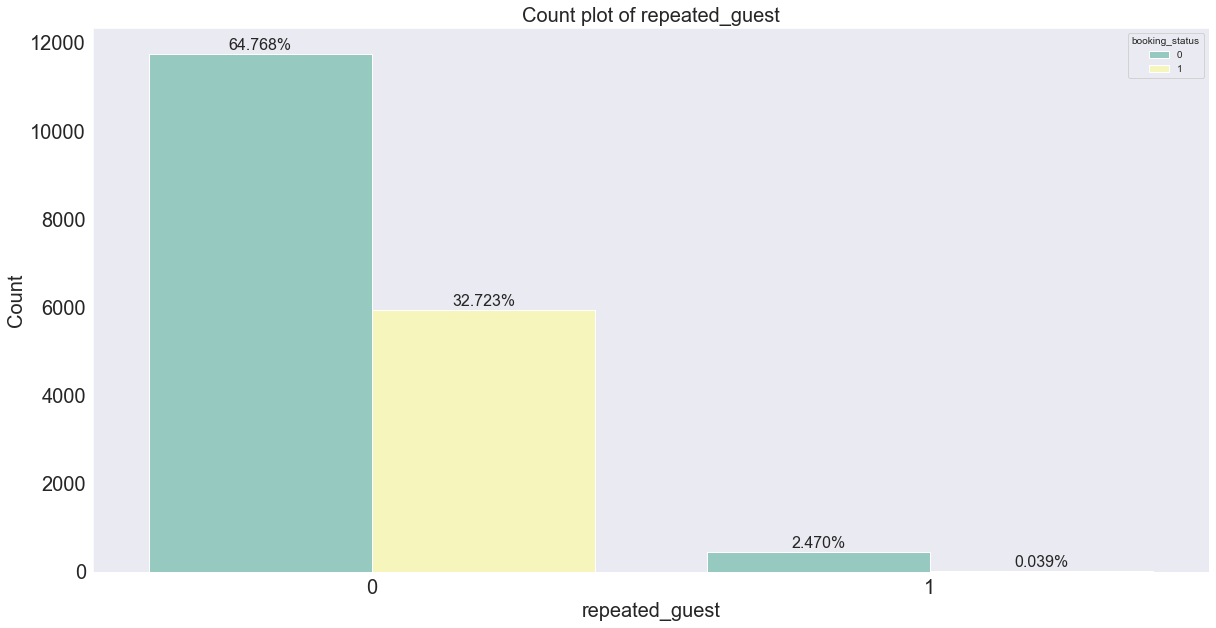

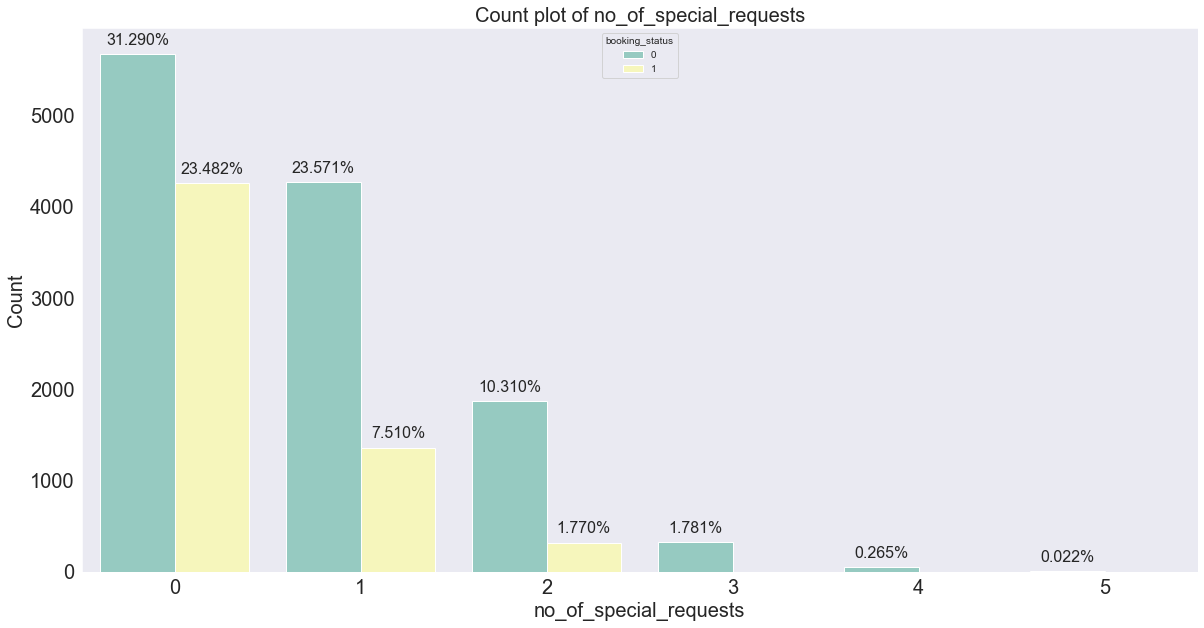

In [34]:

for i in categoricalV:
    plt.figure(figsize=(20,10))
    sns.set_style("dark")
    plot=sns.countplot(x=i,data =traindataset,palette='Set3',hue='booking_status')
    for bar in plot.patches:
      
        percentage = '{:.3f}%'.format(100 * bar.get_height()/len(traindataset))
        x = bar.get_x() + bar.get_width()/2
        y = bar.get_height()+100
        plot.annotate(percentage, (x, y),ha='center',size=16)
    plt.xticks(size=20)
    plt.xlabel(i,size=20)
    plt.yticks(size=20)
    plt.ylabel('Count',size=20)
    plt.title('Count plot of ' + i,size=20)
    plt.show()
    

In [35]:

#Total no of peoples along with children
k=traindataset['no_of_children']+traindataset['no_of_adults']

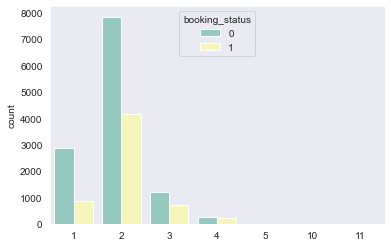

In [36]:
plot=sns.countplot(x=k,data =traindataset,palette='Set3',hue='booking_status')

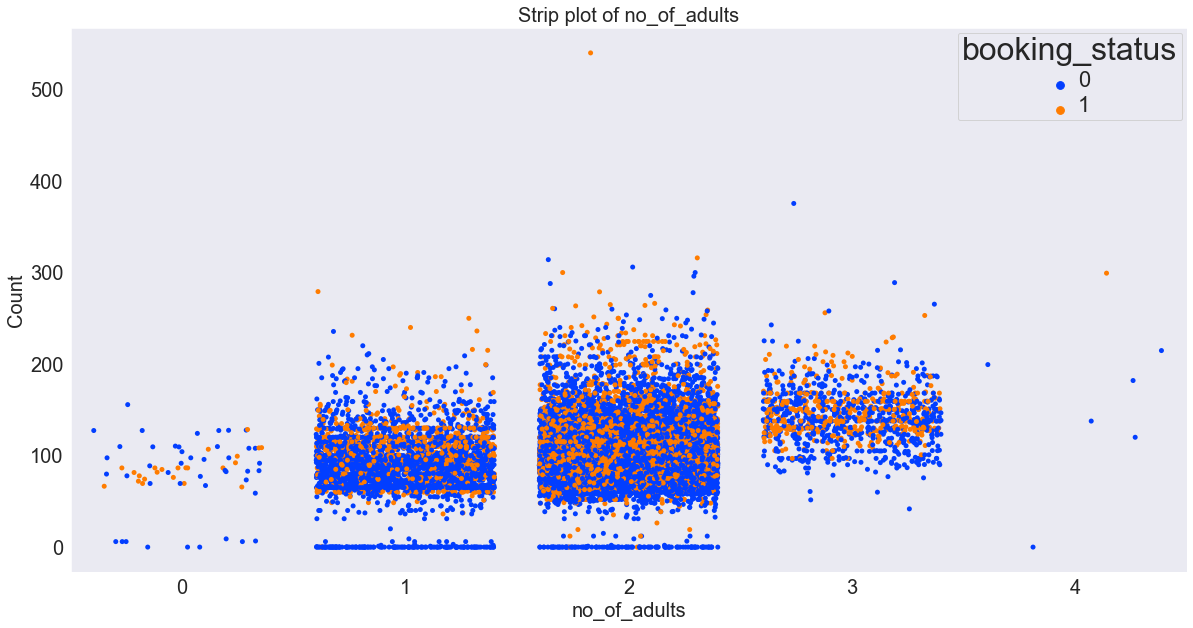

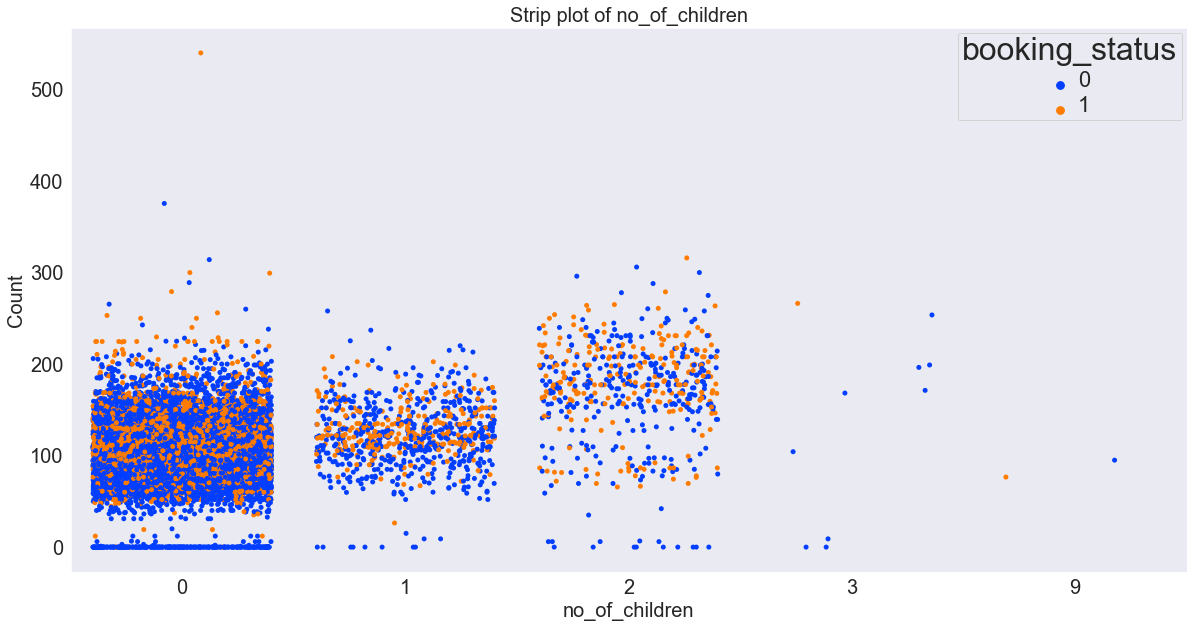

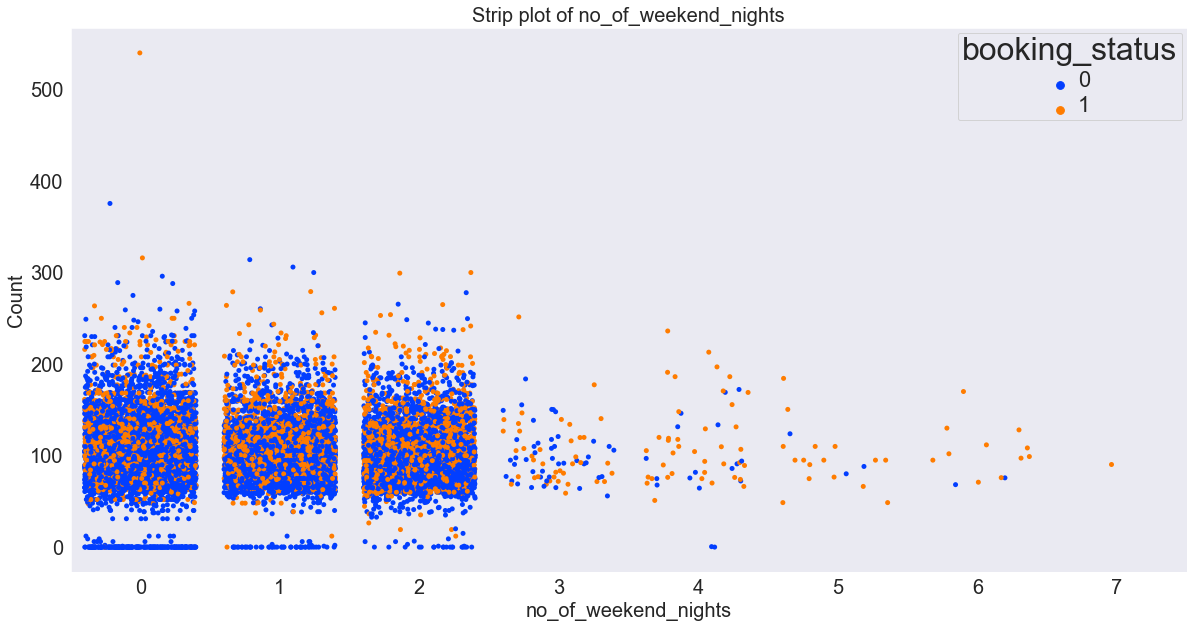

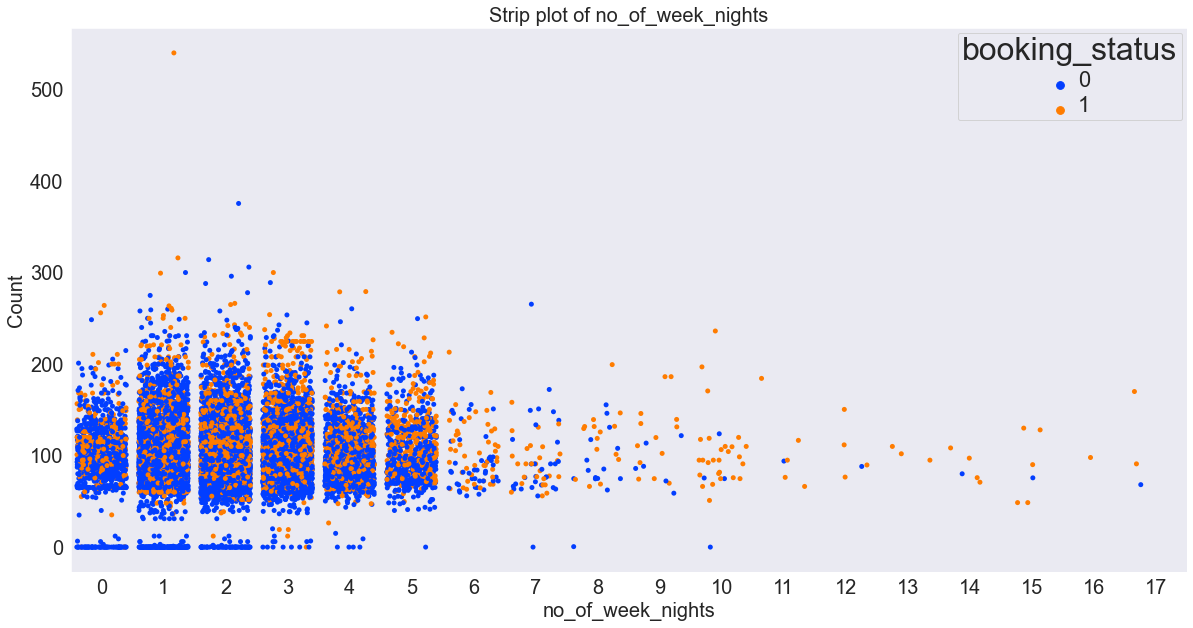

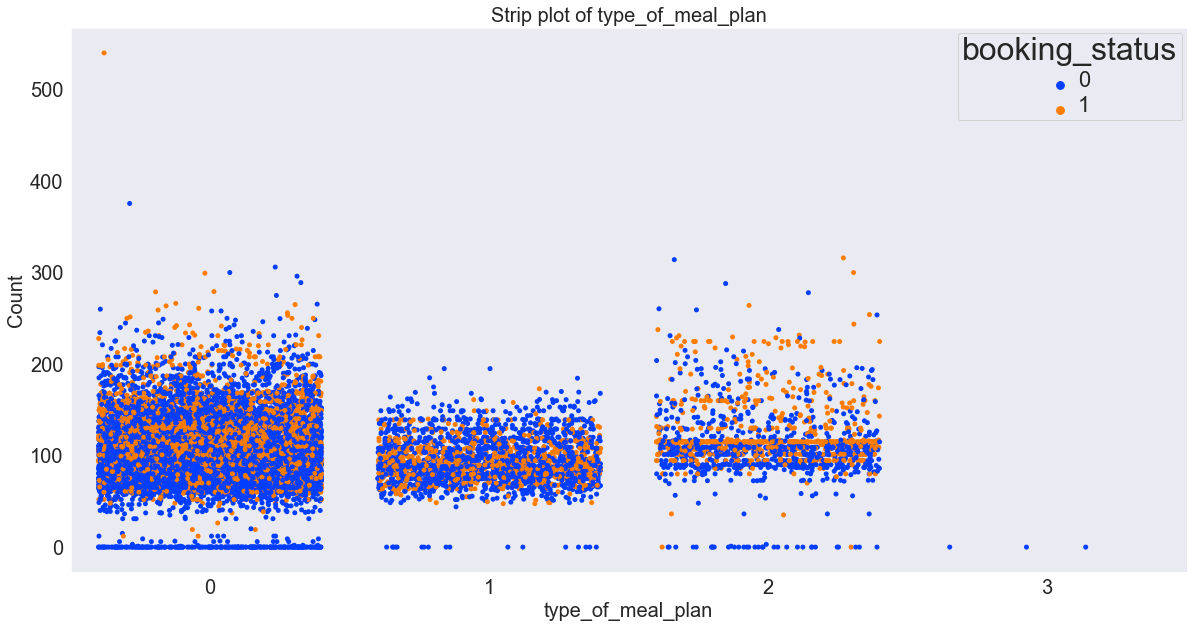

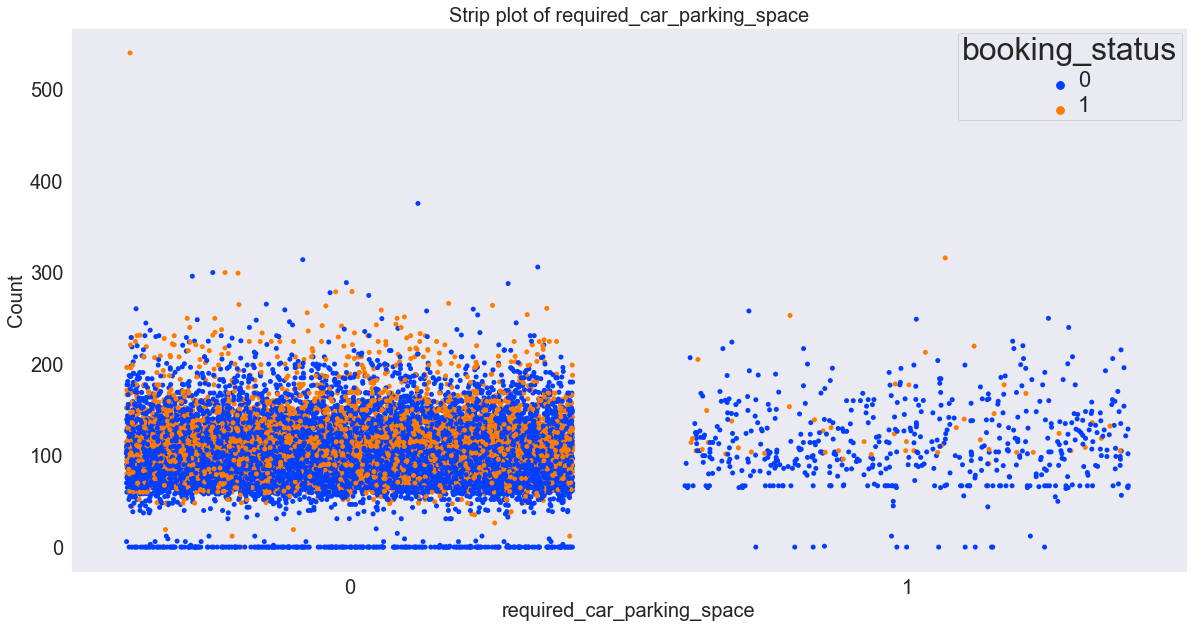

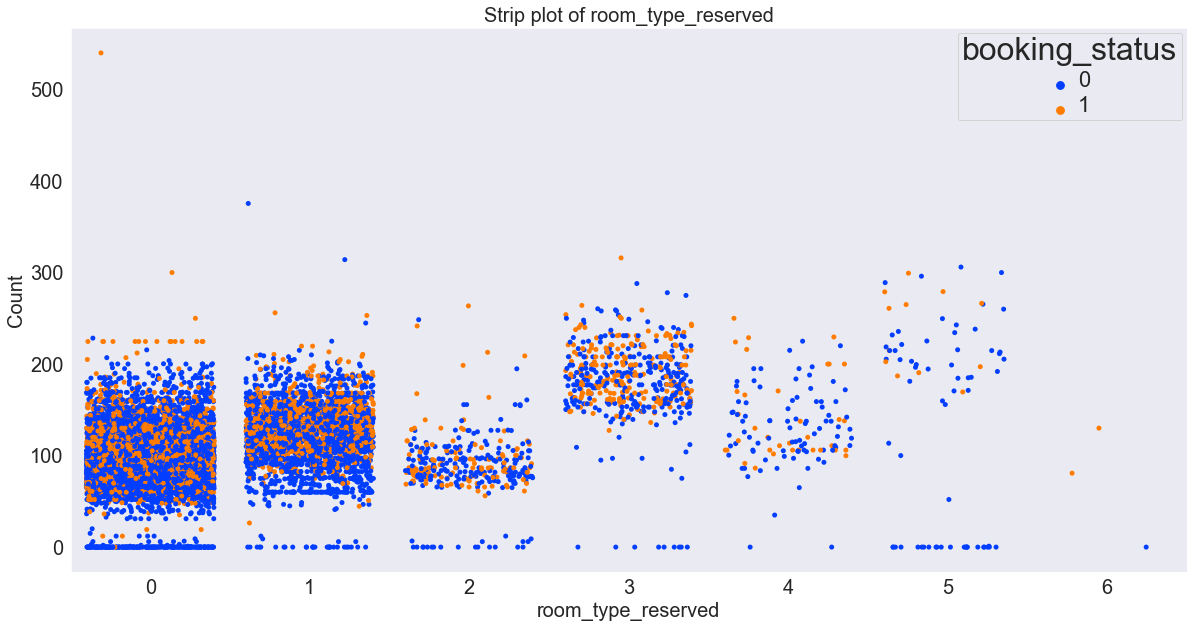

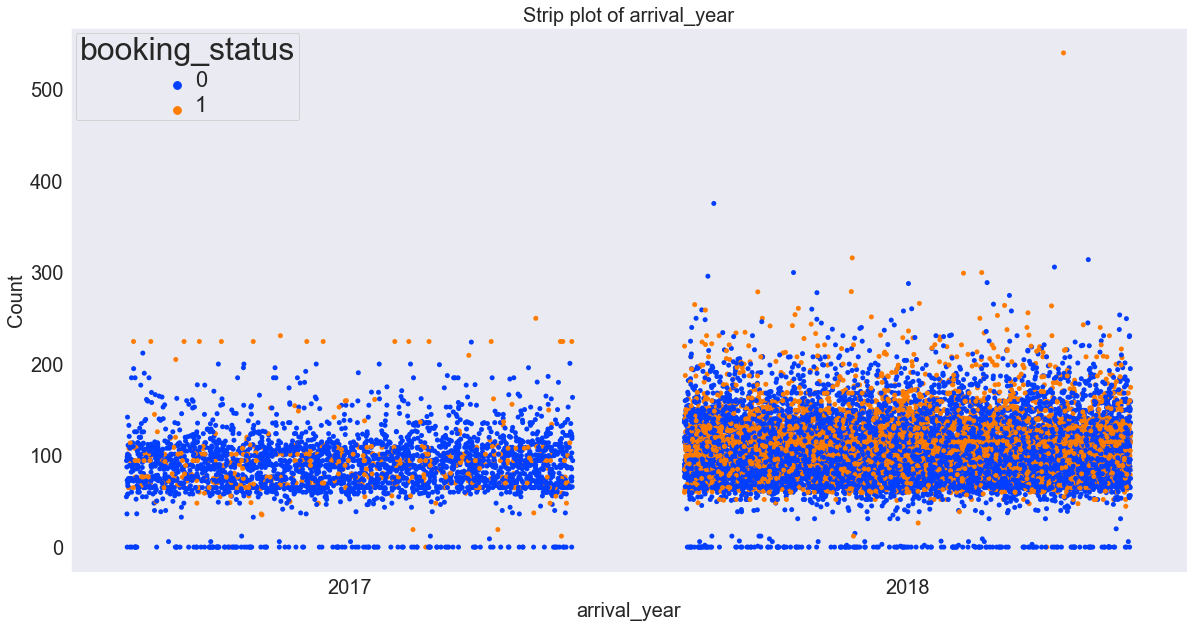

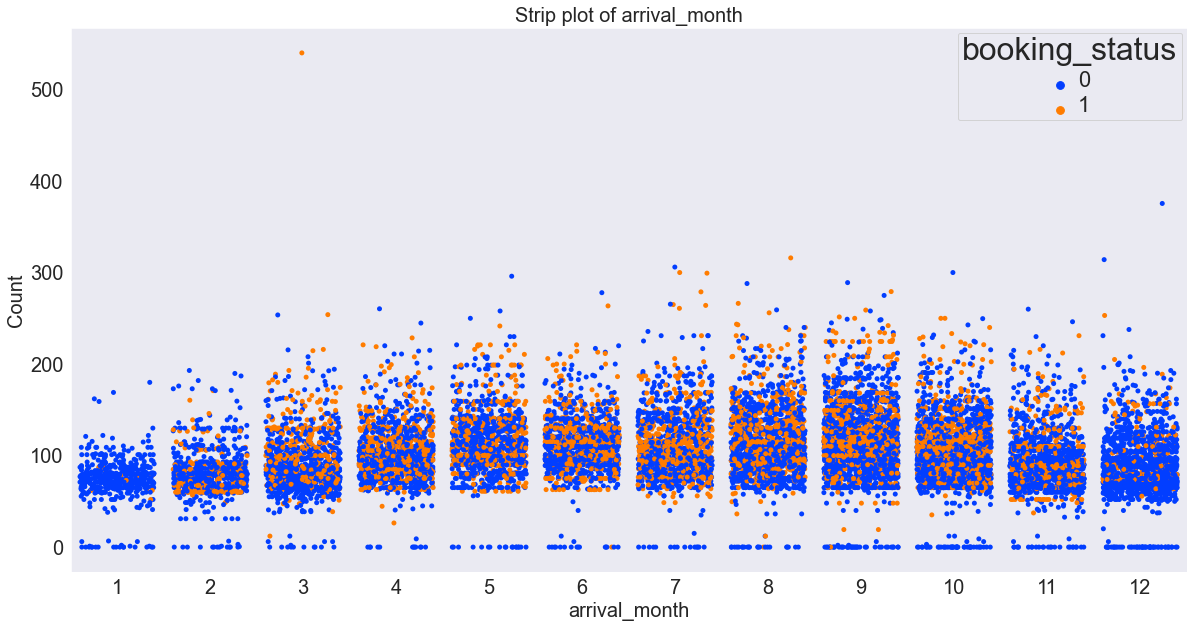

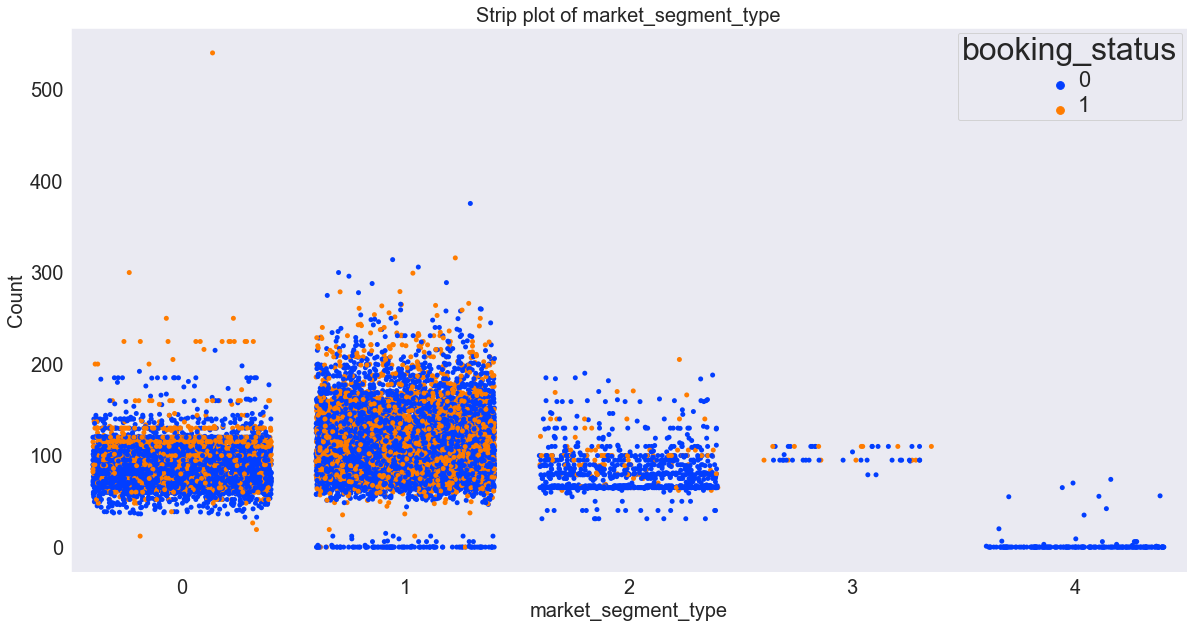

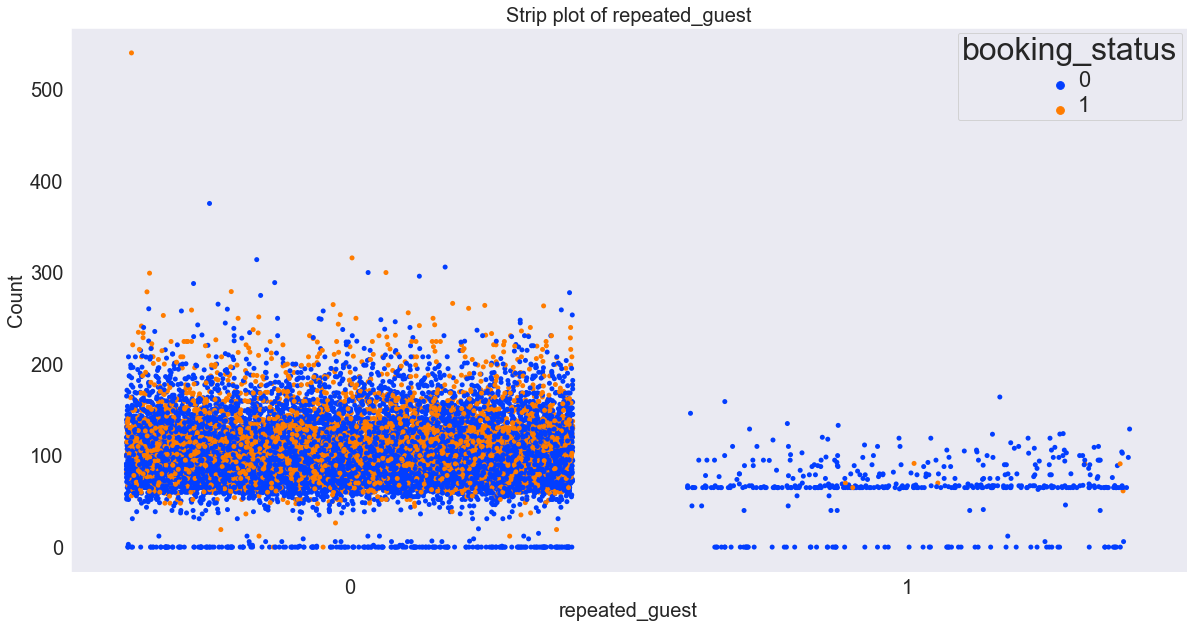

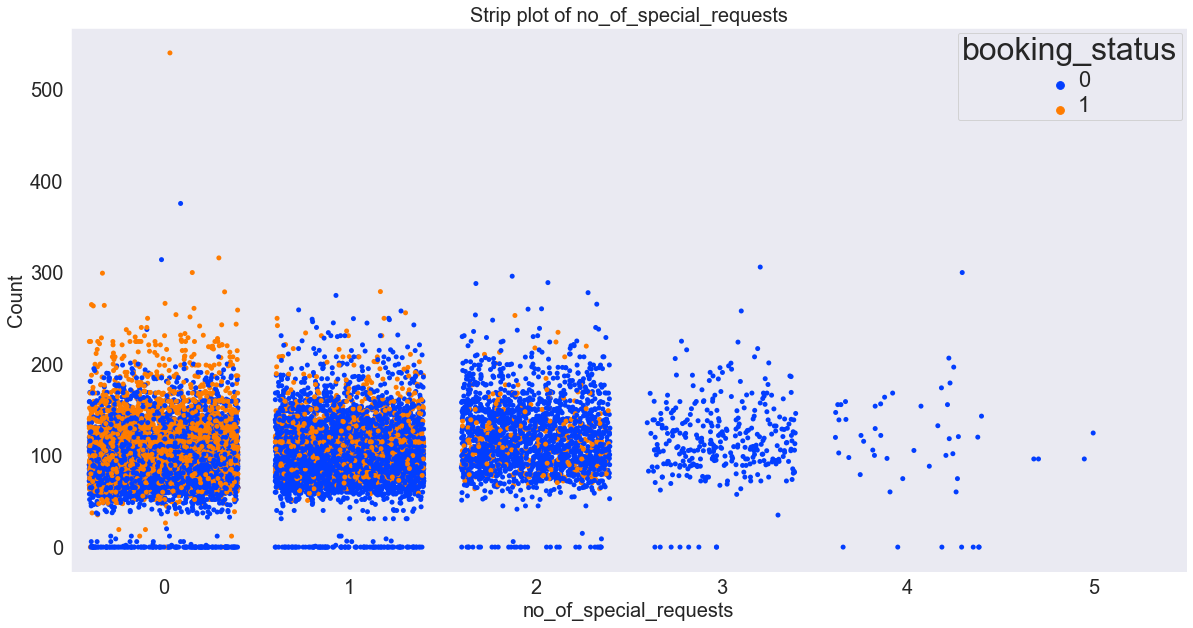

In [37]:
#showing the stripplot of avg_price_per_room and some categorical variables according to the target column
for i in categoricalV:
    
    plt.figure(figsize=(20,10))
    sns.set_style("dark")
    plot= sns.stripplot(data=traindataset, x=i ,y='avg_price_per_room',hue='booking_status',jitter=0.4,palette='bright')
    plt.xticks(size=20)
    plt.xlabel(i,size=20)
    plt.yticks(size=20)
    plt.ylabel('Count',size=20)
    plt.title('Strip plot of ' + i,size=20)
    plt.setp(plot.get_legend().get_texts(), size=22) # for legend text
    plt.setp(plot.get_legend().get_title(), size=32) # for legend title
    plt.show()

In [46]:
traindataset['booking_status'].unique()#we have 0 for Not Canceled 1 for Canceled values

array([0, 1], dtype=int64)

In [47]:
traindataset['booking_status'].value_counts(normalize=True)#convert on normalization or %

0    0.672382
1    0.327618
Name: booking_status, dtype: float64

Above it shows that  in train set  we have 67.23% Not Canceled and   32.7618% Canceled

Text(0, 0.5, 'Percentage of Bookings')

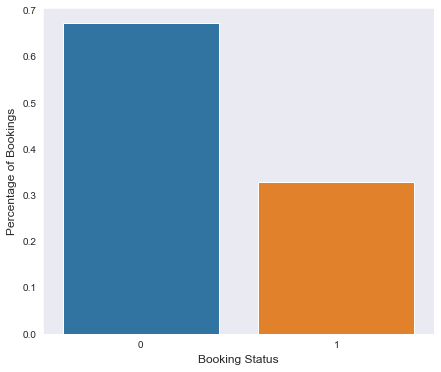

In [49]:

plt.figure(figsize=(7,6))
sns.barplot(x=traindataset['booking_status'].unique(),y=traindataset['booking_status'].value_counts(normalize=True))
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Percentage of Bookings", fontsize = 12, labelpad = 5)


Text(0, 0.5, 'Price % of Bookings')

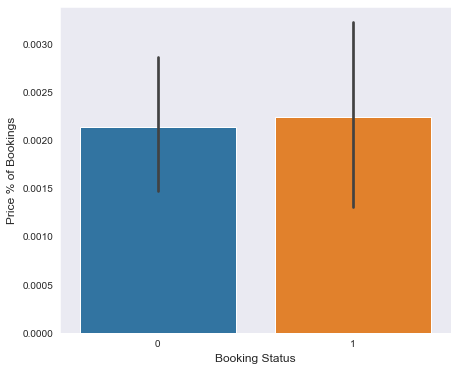

In [50]:
#above it shows that  in train set  we have 67.23% Not Canceled and   32.7618% Canceled
plt.figure(figsize=(7,6))
sns.barplot(x=traindataset['booking_status'],y=traindataset['avg_price_per_room'].value_counts(normalize=True))
plt.xlabel("Booking Status", fontsize = 12, labelpad = 5)
plt.ylabel("Price % of Bookings", fontsize = 12, labelpad = 5)

<AxesSubplot:xlabel='lead_time'>

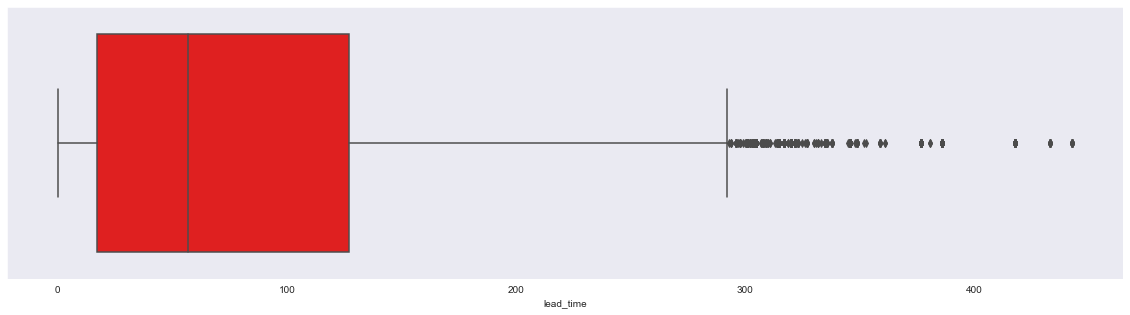

In [51]:
#its clear that most off the booking were canncel bcoz of high cost 
plt.figure(figsize=(20,5))

sns.boxplot(x=traindataset['lead_time'],color='Red')

C:\Users\ASU\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


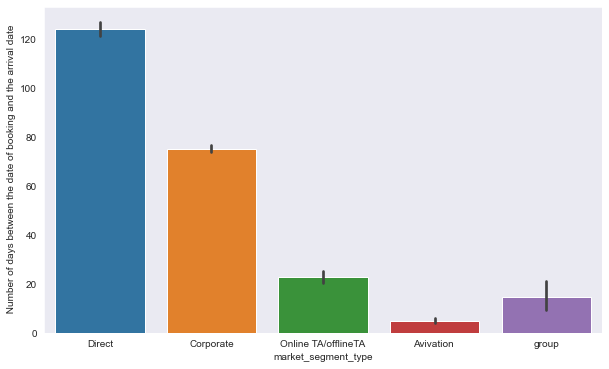

In [52]:
#there are lot of outlier(is abnormally large or small values that can cause noise in data fall above 300


labels = ['Direct', 'Corporate', 'Online TA/offlineTA', 'Avivation ','group']
ax=plt.subplots(figsize=(10,6))
sns.barplot(traindataset['market_segment_type'],traindataset['lead_time'])
#ax.scatter(traindataset['market_segment_type'],traindataset['lead_time'])
plt.xlabel('market_segment_type')
plt.ylabel(' Number of days between the date of booking and the arrival date')
plt.xticks([0,1,2,3,4],labels)

plt.show()

In [53]:
#here we see that Avivation have min no of waiting days resone bcoze  Avivation(piolets,airhostig need immeededt booking )

#Full Dataset
traindataset.describe()
categoricalV1=traindataset.drop(columns=['booking_status','arrival_date'])


In [54]:
categoricalV1.head(10)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  4   
1             2               1                     0                  2   
2             1               0                     1                  5   
3             1               0                     2                  4   
4             2               0                     0                  4   
5             2               0                     2                  3   
6             1               0                     0                  2   
7             2               0                     1                  3   
8             2               0                     2                  2   
9             2               0                     0                  2   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  0                           0                   0   
1                  0                           0                   0   
2                  0                           0                   0   
3                  0                           0                   0   
4                  1                           0                   0   
5                  0                           0                   1   
6                  0                           0                   4   
7                  2                           0                   0   
8                  0                           0                   1   
9                  2                           0                   0   

   lead_time  arrival_year  arrival_month  market_segment_type  \
0        118          2017             12                    1   
1         17          2018              4                    1   
2        349          2018             10                    0   
3         69          2018              6                    0   
4         11          2018              1                    1   
5         51          2018              9                    1   
6          7          2018              2                    2   
7         61          2018             11                    1   
8         32          2018              9                    1   
9         39          2017              8                    0   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   
5               0                             0   
6               0                             0   
7               0                             0   
8               0                             0   
9               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0              110.80   
1                                     0              145.00   
2                                     0               96.67   
3                                     0              120.00   
4                                     0               69.50   
5                                     0              149.40   
6                                     0               86.00   
7                                     0              120.70   
8                                     0              134.78   
9                                     0              109.00   

   no_of_special_requests  
0                       2  
1                       0  
2                       0  
3                       0  
4                       1  
5                       1  
6                       0  
7                       1  
8                       1  
9                       0

In [55]:
traindataset['avg_price_per_room'].unique()

array([110.8 , 145.  ,  96.67, ..., 170.17,  84.45, 148.6 ])

In [56]:
traindataset['market_segment_type'].unique()

array([1, 0, 2, 4, 3], dtype=int64)

In [57]:
#grp=traindataset.groupby(['datetimeyear','lead_time','no_of_week_nights','avg_price_per_room']).mean()
#grp.head(20)


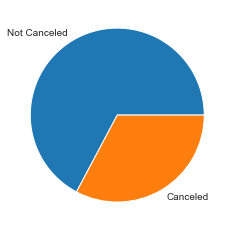

In [58]:
x = traindataset['booking_status'].value_counts()
plt.pie(x,labels=['Not Canceled', 'Canceled']);

In [ ]:
grp=traindataset.groupby(['repeated_guest','booking_status']).size()
grp.plot(kind='bar')



In [ ]:
#(1,1) means when bboking is canceled and custmer is repeted guest the entery is almost Zero

total_no_of_previous_cancellations=traindataset['no_of_previous_cancellations'].sum()
total_no_of_previous_cancellations

In [ ]:
traindataset.describe()


In [ ]:
st=traindataset.loc[(traindataset['booking_status'] == 1 )& (traindataset['no_of_previous_cancellations']>0) ]

In [ ]:
#st shows booking_status which were cancelled and also have 'no_of_previous_cancellations >0
#so % will bw [0, 1], labels=['Not Canceled', 'Canceled']
CANpre=(st.shape[0]/traindataset.shape[0])*100
CANpre

In [ ]:
max_price=traindataset['avg_price_per_room'].max()
st=traindataset.loc[(traindataset['booking_status'] == 1 )& (traindataset['avg_price_per_room']>=103.4788680597679)]
st.shape[0]

In [ ]:
CANpre=(st.shape[0]/traindataset.shape[0])*100
CANpre

In [ ]:
traindataset['avg_price_per_room'].max()

In [ ]:
traindataset['avg_price_per_room'].min()

In [ ]:
traindataset['avg_price_per_room'].mean()

In [ ]:
list1=list(traindataset.columns)


In [63]:
#label
canc_Y=traindataset['booking_status']

In [64]:
#feature
canc_X=traindataset.drop('booking_status',axis=1)


StandardScaler is used 
 is to normalize/standardize  data 

In [65]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(traindataset)
scaled_features = scaler.transform(traindataset)
scaled_data = pd.DataFrame(scaled_features, columns =traindataset.columns)
#label
canc_Y=scaled_data['booking_status']
#feature
canc_X=scaled_data.drop('booking_status',axis=1)
canc_Y
canc_X'''

"from sklearn.preprocessing import StandardScaler\nscaler = StandardScaler()\nscaler.fit(traindataset)\nscaled_features = scaler.transform(traindataset)\nscaled_data = pd.DataFrame(scaled_features, columns =traindataset.columns)\n#label\ncanc_Y=scaled_data['booking_status']\n#feature\ncanc_X=scaled_data.drop('booking_status',axis=1)\ncanc_Y\ncanc_X"

Train Test split
Split arrays or matrices into random train and test subsets.

In [66]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(canc_X,canc_Y,test_size=0.33, random_state=42)


KNeighborsClassifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
model = KNeighborsClassifier(n_neighbors = 3)
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)


In [73]:
print("Test set prediction :{}".format(predictions))

Test set prediction :[1 0 0 ... 0 0 1]


In [70]:
y_score=model.score(x_test_data,y_test_data)
print("Test set accuracy :{:.2f}".format(y_score))

Test set accuracy :0.79


WE see that our is about 83% accurate ,meaning the model predicted the class correctly for 83% of the samples in the testdata

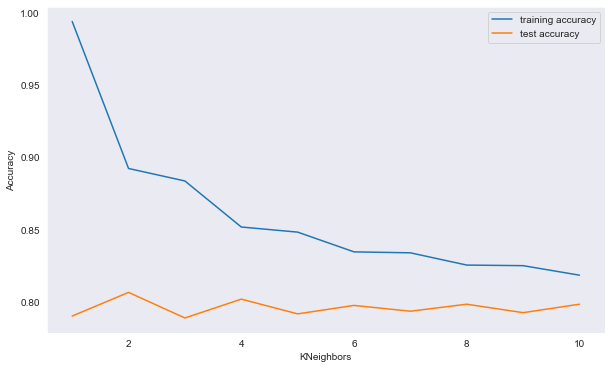

In [71]:
plt.subplots(figsize=(10,6))
traing_acuracy=[]
test_accuracy=[]
neighbors_settings=range(1,11)

for i in neighbors_settings:
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_training_data, y_training_data)
    traing_acuracy.append(model.score(x_training_data, y_training_data))
    test_accuracy.append(model.score(x_test_data, y_test_data))

plt.plot(neighbors_settings,traing_acuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("KNeighbors")
plt.legend()
    

In [79]:
predictionKNeighborsClassifiers = model.predict(test_dataset)[:1]
#xgb_pred = model.predict_proba(test_dataset)[:,1]
predictions

C:\Users\ASU\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- ID
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
 '''def plot_classification():
    h = .02
    n_neighbors = 9
    X = canc_X.values[:10, [1,4]] #trim values to 10 entries and only columns 2 and 5 (indices 1, 4) canc_X,canc_Y
    y = canc_Y[:10, ] #trim outcome column, too

    clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
    clf.fit(X, y)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = y[:, 1].min() - 1, y[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) #no errors here, but it's  not moving on until computer crashes

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Classification (k = %i)" % (n_neighbors))
plot_classification()'''

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_training_data,y_training_data)

In [ ]:
#predicting the test data
y_pred= logistic.predict(x_test_data)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
accuracy_score(y_test_data,y_pred)

In [ ]:
classification_report(y_test_data,y_pred)

AUC - ROC Curve
In classification, there are many different evaluation metrics. The most popular is accuracy, which measures how often the model is correct. This is a great metric because it is easy to understand and getting the most correct guesses is often desired. There are some cases where you might consider using another evaluation metric.

Another common metric is AUC, area under the receiver operating characteristic (ROC) curve. The Reciever operating characteristic curve plots the true positive (TP) rate versus the false positive (FP) rate at different classification thresholds. The thresholds are different probability cutoffs that separate the two classes in binary classification. It uses probability to tell us how well a model separates the classes.

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
#model and training
my_model_xgb = XGBClassifier(n_estimators=1000,seed=0,learning_rate=0.05)

#my_model.fit(X_train_full,y)
my_model_xgb.fit(x_training_data,y_training_data,early_stopping_rounds=5,
            eval_set=[(x_test_data,y_test_data)],verbose=False)

# evaluate the model
acc = accuracy_score(y_test_data, my_model_xgb.predict(x_test_data))
#roc = cohen_kappa_score(y_valid,my_model_xgb.predict(X_valid))
roc = roc_auc_score(y_test_data,my_model_xgb.predict(x_test_data))
print("Baseline XGBClassifier Model roc_auc:",roc)
print("Baseline XGBClassifier Model accuracy_score:",acc)

In [ ]:
importances = my_model_xgb.feature_importances_
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(x_training_data.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), x_training_data.columns[sorted_indices], rotation=90)
plt.tight_layout()
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3)
plt.show()

In [ ]:
xgb_pred = my_model_xgb.predict_proba(test_dataset)[:,1]

In [ ]:
xgb_pred
l=[]
for i in xgb_pred:
    k=round(i, 0)
    l.append(int(k))


In [ ]:
output = pd.DataFrame({'id': test_dataset.ID, 'booking_status': l})
output.to_csv('C:/Users/ASU/Desktop/IITD/DATAScience/PythonProjectDataset/submission.csv', index=False)

In [ ]:
test_dataset.info()